<a href="https://colab.research.google.com/github/DSNortsev/CSE696-CECS_PROJECT/blob/master/CSE_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data from local SCV files

In [ ]:
# Load from local files
import pandas as pd
import numpy as np
import glob

# Path to csv files
covid_data = 'Data/covid/*.csv'
vaccination_usa = 'Data/vaccinations/us.csv'
vaccination_usa_state = 'Data/vaccinations/us_state_vaccinations.csv'


def read_multiple_csv(regex_path):
    data = pd.DataFrame()
    # Read all css files per day comnine in one dataset
    for file in glob.glob(covid_data):
        df = pd.read_csv(file)
        # Check if "Last_update" column has null values, fill it with forward fill
        # propagate[s] last valid observation forward to next valid
        if df['Last_Update'].isna().sum() > 0:
            df.fillna(method='ffill', inplace=True)
        # Remove invalid states from dataset
        df = df[~df['Province_State'].isin(['Diamond Princess', 'Grand Princess', 'Recovered'])]
        # Set Recovered field to 0 when no confirmed cases
        df['Recovered'] = df.apply(lambda x: x['Confirmed'] if x['Confirmed']==0 else x['Recovered'], axis=1)
        data = data.append(df,ignore_index=True)
    return data


# Load data
vac_usa_data = pd.read_csv(vaccination_usa)
vac_state_data = pd.read_csv(vaccination_usa_state)
covid_data = read_multiple_csv(covid_data)

# Load SCV files from remote github repository

In [77]:
from urllib.request import urlopen
import pandas as pd
import numpy as np
import re

# Example of github link
# https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/us_state_vaccinations.csv

# Hopkins covid 19 dataset
git_raw_domain = 'https://raw.githubusercontent.com/'
covid_url = "https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports_us"

# URL Link to cvs file for vaccination in USA by day
url_vaccination_usa = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/'\
                       + 'country_data/United%20States.csv'
# URL Link to cvs file for vaccination in USA by state
url_vaccination_state = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/'\
                       + 'us_state_vaccinations.csv'

url_state_population = 'https://raw.githubusercontent.com/JoshData/historical-state-population-csv/primary/historical_state_population_by_year.csv'


def load_file_from_github(url, raw_domain):
    """
        Load file from github:
            url - github url for all csv files
            raw_domain  - domain to get raw csv file
    """
    # Get github page
    txt = urlopen(url).read().decode('utf8')
    links = re.findall("href=[\"\'](.*?csv)[\"\']", txt)
    # Create pandas DataFrame
    data = pd.DataFrame()

    for link in links:
        df = pd.read_csv(raw_domain + link.replace('blob/', ''),error_bad_lines=False)
        # Check if "Last_update" column has null values, fill it with forward fill
        # propagate[s] last valid observation forward to next valid
        if df['Last_Update'].isna().sum() > 0:
            # Each file should be for one specific day
            df.fillna(method='ffill', inplace=True)
        # Remove invalid states from dataset
        df = df[~df['Province_State'].isin(['Diamond Princess', 'Grand Princess', 'Recovered'])]
        # Set Recovered field to 0 when no confirmed cases
        df['Recovered'] = df.apply(lambda x: x['Confirmed'] if x['Confirmed']==0 else x['Recovered'], axis=1)
        data = data.append(df,ignore_index=True)
    return data

# Load data
vac_usa_data = pd.read_csv(url_vaccination_usa,error_bad_lines=False)
vac_state_data = pd.read_csv(url_vaccination_state,error_bad_lines=False)
covid_data = load_file_from_github(covid_url, git_raw_domain)
population_state = pd.read_csv(url_state_population, error_bad_lines=False)

In [85]:
# Rename columns in population dataset
population_state.columns = ['State', 'Year', 'Population']
# Get population for 2019
population_state = population_state[population_state['Year'] == 2019].reset_index(drop=True)
population_state = population_state[['State', 'Population']]
population_state

State  Population
0     AK      731545
1     AL     4903185
2     AR     3017804
3     AZ     7278717
4     CA    39512223
5     CO     5758736
6     CT     3565287
7     DC      705749
8     DE      973764
9     FL    21477737
10    GA    10617423
11    HI     1415872
12    IA     3155070
13    ID     1787065
14    IL    12671821
15    IN     6732219
16    KS     2913314
17    KY     4467673
18    LA     4648794
19    MA     6892503
20    MD     6045680
21    ME     1344212
22    MI     9986857
23    MN     5639632
24    MO     6137428
25    MS     2976149
26    MT     1068778
27    NC    10488084
28    ND      762062
29    NE     1934408
30    NH     1359711
31    NJ     8882190
32    NM     2096829
33    NV     3080156
34    NY    19453561
35    OH    11689100
36    OK     3956971
37    OR     4217737
38    PA    12801989
39    RI     1059361
40    SC     5148714
41    SD      884659
42    TN     6829174
43    TX    28995881
44    UT     3205958
45    VA     8535519
46    VT      623989
47    WA     7614893
48    WI     5822434
49    WV     1792147
50    WY      578759

In [86]:
# Sort dataset by date
vac_usa_data = vac_usa_data.sort_values(by='date')
vac_usa_data

location        date                   vaccine  \
0   United States  2020-12-20           Pfizer/BioNTech   
1   United States  2020-12-21           Pfizer/BioNTech   
2   United States  2020-12-23  Moderna, Pfizer/BioNTech   
3   United States  2020-12-26  Moderna, Pfizer/BioNTech   
4   United States  2020-12-28  Moderna, Pfizer/BioNTech   
..            ...         ...                       ...   
58  United States  2021-03-02  Moderna, Pfizer/BioNTech   
59  United States  2021-03-03  Moderna, Pfizer/BioNTech   
60  United States  2021-03-04  Moderna, Pfizer/BioNTech   
61  United States  2021-03-05  Moderna, Pfizer/BioNTech   
62  United States  2021-03-06  Moderna, Pfizer/BioNTech   

                                           source_url  total_vaccinations  \
0   https://www.cdc.gov/coronavirus/2019-ncov/vacc...              556208   
1   https://covid.cdc.gov/covid-data-tracker/#vacc...              614117   
2   https://covid.cdc.gov/covid-data-tracker/#vacc...             1008025   
3   https://covid.cdc.gov/covid-data-tracker/#vacc...             1944585   
4   https://covid.cdc.gov/covid-data-tracker/#vacc...             2127143   
..                                                ...                 ...   
58  https://covid.cdc.gov/covid-data-tracker/#vacc...            78631601   
59  https://covid.cdc.gov/covid-data-tracker/#vacc...            80540474   
60  https://covid.cdc.gov/covid-data-tracker/#vacc...            82572848   
61  https://covid.cdc.gov/covid-data-tracker/#vacc...            85008094   
62  https://covid.cdc.gov/covid-data-tracker/#vacc...            87912323   

    people_vaccinated  people_fully_vaccinated  
0            556208.0                      NaN  
1            614117.0                      NaN  
2           1008025.0                      NaN  
3           1944585.0                      NaN  
4           2127143.0                      NaN  
..                ...                      ...  
58         51755447.0               26162122.0  
59         52855579.0               26957804.0  
60         54035670.0               27795980.0  
61         55547697.0               28701201.0  
62         57358849.0               29776160.0  

[63 rows x 7 columns]

In [87]:
# Sort dataset by date
vac_state_dat = vac_state_data.sort_values(by='date')
vac_state_dat

date         location  total_vaccinations  total_distributed  \
3025  2020-12-20    United States            556208.0                NaN   
3026  2020-12-21    United States            614117.0                NaN   
3027  2020-12-22    United States                 NaN                NaN   
3028  2020-12-23    United States           1008025.0                NaN   
3029  2020-12-24    United States                 NaN                NaN   
...          ...              ...                 ...                ...   
3322  2021-03-07   Virgin Islands             23033.0            40420.0   
1869  2021-03-07         Missouri           1600118.0          2032445.0   
604   2021-03-07  Dept of Defense           1130833.0          1711265.0   
1759  2021-03-07        Minnesota           1681447.0          1953700.0   
3597  2021-03-07          Wyoming            178035.0           236065.0   

      people_vaccinated  people_fully_vaccinated_per_hundred  \
3025                NaN                                  NaN   
3026                NaN                                  NaN   
3027                NaN                                  NaN   
3028                NaN                                  NaN   
3029                NaN                                  NaN   
...                 ...                                  ...   
3322            15393.0                                 7.28   
1869          1035633.0                                 8.91   
604            758512.0                                  NaN   
1759          1113723.0                                 9.96   
3597           111926.0                                11.30   

      total_vaccinations_per_hundred  people_fully_vaccinated  \
3025                            0.17                      NaN   
3026                            0.18                      NaN   
3027                             NaN                      NaN   
3028                            0.30                      NaN   
3029                             NaN                      NaN   
...                              ...                      ...   
3322                           22.00                   7622.0   
1869                           26.07                 547105.0   
604                              NaN                 361473.0   
1759                           29.82                 561546.0   
3597                           30.76                  65420.0   

      people_vaccinated_per_hundred  distributed_per_hundred  \
3025                            NaN                      NaN   
3026                            NaN                      NaN   
3027                            NaN                      NaN   
3028                            NaN                      NaN   
3029                            NaN                      NaN   
...                             ...                      ...   
3322                          14.70                    38.61   
1869                          16.87                    33.12   
604                             NaN                      NaN   
1759                          19.75                    34.64   
3597                          19.34                    40.79   

      daily_vaccinations_raw  daily_vaccinations  \
3025                     NaN                 NaN   
3026            57909.000000             57909.0   
3027           196954.000000            127432.0   
3028           196954.000000            150606.0   
3029           312186.666667            191001.0   
...                      ...                 ...   
3322               19.000000               523.0   
1869            47961.000000             45816.0   
604             36268.000000             19726.0   
1759            53450.000000             41066.0   
3597              539.000000              3091.0   

      daily_vaccinations_per_million  share_doses_used  
3025                             NaN               NaN  
3026                           174.0     

In [88]:
# Sort dataset by date
covid_data = covid_data.sort_values(by=['Last_Update', 'Province_State'])
covid_data

Province_State Country_Region          Last_Update      Lat     Long_  \
3640         Alabama             US  2020-04-12 23:18:15  32.3182  -86.9023   
3641          Alaska             US  2020-04-12 23:18:15  61.3707 -152.4044   
3693  American Samoa             US  2020-04-12 23:18:15 -14.2710 -170.1322   
3642         Arizona             US  2020-04-12 23:18:15  33.7298 -111.4312   
3643        Arkansas             US  2020-04-12 23:18:15  34.9697  -92.3731   
...              ...            ...                  ...      ...       ...   
3636      Washington             US  2021-03-07 05:31:30  47.4009 -121.4905   
3637   West Virginia             US  2021-03-07 05:31:30  38.4912  -80.9545   
3638       Wisconsin             US  2021-03-07 05:31:30  44.2685  -89.6165   
3639         Wyoming             US  2021-03-07 05:31:30  42.7560 -107.3025   
3589      California             US  2021-03-07 08:30:37  36.1162 -119.6816   

      Confirmed  Deaths  Recovered     Active  FIPS  Incident_Rate  \
3640       3667      93        NaN     3470.0   1.0      75.988020   
3641        272       8       66.0      264.0   2.0      45.504049   
3693          0       0        0.0        0.0  60.0       0.000000   
3642       3542     115       66.0     3427.0   4.0      48.662422   
3643       1280      27      367.0     1253.0   5.0      49.439423   
...         ...     ...        ...        ...   ...            ...   
3636     344532    5041        NaN   339491.0  53.0    4524.449654   
3637     133290    2323   124502.0     6465.0  54.0    7437.447933   
3638     621275    7103   552311.0    61861.0  55.0   10670.365692   
3639      54764     682    53550.0      532.0  56.0    9462.315057   
3589    3596760   54134        NaN  3542626.0   6.0    9102.904689   

      Total_Test_Results  People_Hospitalized  Case_Fatality_Ratio  \
3640                 NaN                437.0                  NaN   
3641                 NaN                 31.0                  NaN   
3693                 NaN                 40.0                  NaN   
3642                 NaN                 31.0                  NaN   
3643                 NaN                130.0                  NaN   
...                  ...                  ...                  ...   
3636           5344402.0                  NaN             1.463144   
3637           2218488.0                  NaN             1.742816   
3638           7037081.0                  NaN             1.143294   
3639            649293.0                  NaN             1.245344   
3589          49294503.0                  NaN             1.505077   

             UID ISO3   Testing_Rate  Hospitalization_Rate  People_Tested  \
3640  84000001.0  USA     460.300152             12.264945        21583.0   
3641  84000002.0  USA    1344.711576             11.397059         8038.0   
3693        16.0  ASM       5.391708             14.814815            3.0   
3642  84000004.0  USA     578.522286             11.397059        42109.0   
3643  84000005.0  USA     761.753354             10.156250        19722.0   
...          ...  ...            ...                   ...            ...   
3636  84000053.0  USA   70183.546899                   NaN            NaN   
3637  84000054.0  USA  123789.398972                   NaN            NaN   
3638  84000055.0  USA  120861.498816                   NaN            NaN   
3639  84000056.0  USA  112187.110697                   NaN            NaN   
3589  84000006.0  USA  124757.604754                   NaN            NaN   

      Mortality_Rate  
3640        2.610160  
3641        2.941176  
3693        0.000000  
3642        3.246753  
3643        2.109375  
...              ...  
3636             NaN  
3637             NaN  
3638             NaN  
3639             NaN  
3589             NaN  

[18424 rows x 20 columns]

In [89]:
# Rename columns
covid_data.rename(columns = {'Province_State':'location', 'Last_Update': 'date' }, inplace = True)
covid_data

location Country_Region                 date      Lat     Long_  \
3640         Alabama             US  2020-04-12 23:18:15  32.3182  -86.9023   
3641          Alaska             US  2020-04-12 23:18:15  61.3707 -152.4044   
3693  American Samoa             US  2020-04-12 23:18:15 -14.2710 -170.1322   
3642         Arizona             US  2020-04-12 23:18:15  33.7298 -111.4312   
3643        Arkansas             US  2020-04-12 23:18:15  34.9697  -92.3731   
...              ...            ...                  ...      ...       ...   
3636      Washington             US  2021-03-07 05:31:30  47.4009 -121.4905   
3637   West Virginia             US  2021-03-07 05:31:30  38.4912  -80.9545   
3638       Wisconsin             US  2021-03-07 05:31:30  44.2685  -89.6165   
3639         Wyoming             US  2021-03-07 05:31:30  42.7560 -107.3025   
3589      California             US  2021-03-07 08:30:37  36.1162 -119.6816   

      Confirmed  Deaths  Recovered     Active  FIPS  Incident_Rate  \
3640       3667      93        NaN     3470.0   1.0      75.988020   
3641        272       8       66.0      264.0   2.0      45.504049   
3693          0       0        0.0        0.0  60.0       0.000000   
3642       3542     115       66.0     3427.0   4.0      48.662422   
3643       1280      27      367.0     1253.0   5.0      49.439423   
...         ...     ...        ...        ...   ...            ...   
3636     344532    5041        NaN   339491.0  53.0    4524.449654   
3637     133290    2323   124502.0     6465.0  54.0    7437.447933   
3638     621275    7103   552311.0    61861.0  55.0   10670.365692   
3639      54764     682    53550.0      532.0  56.0    9462.315057   
3589    3596760   54134        NaN  3542626.0   6.0    9102.904689   

      Total_Test_Results  People_Hospitalized  Case_Fatality_Ratio  \
3640                 NaN                437.0                  NaN   
3641                 NaN                 31.0                  NaN   
3693                 NaN                 40.0                  NaN   
3642                 NaN                 31.0                  NaN   
3643                 NaN                130.0                  NaN   
...                  ...                  ...                  ...   
3636           5344402.0                  NaN             1.463144   
3637           2218488.0                  NaN             1.742816   
3638           7037081.0                  NaN             1.143294   
3639            649293.0                  NaN             1.245344   
3589          49294503.0                  NaN             1.505077   

             UID ISO3   Testing_Rate  Hospitalization_Rate  People_Tested  \
3640  84000001.0  USA     460.300152             12.264945        21583.0   
3641  84000002.0  USA    1344.711576             11.397059         8038.0   
3693        16.0  ASM       5.391708             14.814815            3.0   
3642  84000004.0  USA     578.522286             11.397059        42109.0   
3643  84000005.0  USA     761.753354             10.156250        19722.0   
...          ...  ...            ...                   ...            ...   
3636  84000053.0  USA   70183.546899                   NaN            NaN   
3637  84000054.0  USA  123789.398972                   NaN            NaN   
3638  84000055.0  USA  120861.498816                   NaN            NaN   
3639  84000056.0  USA  112187.110697                   NaN            NaN   
3589  84000006.0  USA  124757.604754                   NaN            NaN   

      Mortality_Rate  
3640        2.610160  
3641        2.941176  
3693        0.000000  
3642        3.246753  
3643        2.109375  
...              ...  
3636             NaN  
3637             NaN  
3638             NaN  
3639             NaN  
3589             NaN  

[18424 rows x 20 columns]

## Handle NaN values in COVID dataset 

In [90]:
# Convert data to YYYY-MM-DD format
covid_data['date'] = pd.to_datetime(covid_data['date'], format='%Y/%m/%d %H:%M:%S').dt.strftime('%Y-%m-%d')
covid_data

location Country_Region        date      Lat     Long_  Confirmed  \
3640         Alabama             US  2020-04-12  32.3182  -86.9023       3667   
3641          Alaska             US  2020-04-12  61.3707 -152.4044        272   
3693  American Samoa             US  2020-04-12 -14.2710 -170.1322          0   
3642         Arizona             US  2020-04-12  33.7298 -111.4312       3542   
3643        Arkansas             US  2020-04-12  34.9697  -92.3731       1280   
...              ...            ...         ...      ...       ...        ...   
3636      Washington             US  2021-03-07  47.4009 -121.4905     344532   
3637   West Virginia             US  2021-03-07  38.4912  -80.9545     133290   
3638       Wisconsin             US  2021-03-07  44.2685  -89.6165     621275   
3639         Wyoming             US  2021-03-07  42.7560 -107.3025      54764   
3589      California             US  2021-03-07  36.1162 -119.6816    3596760   

      Deaths  Recovered     Active  FIPS  Incident_Rate  Total_Test_Results  \
3640      93        NaN     3470.0   1.0      75.988020                 NaN   
3641       8       66.0      264.0   2.0      45.504049                 NaN   
3693       0        0.0        0.0  60.0       0.000000                 NaN   
3642     115       66.0     3427.0   4.0      48.662422                 NaN   
3643      27      367.0     1253.0   5.0      49.439423                 NaN   
...      ...        ...        ...   ...            ...                 ...   
3636    5041        NaN   339491.0  53.0    4524.449654           5344402.0   
3637    2323   124502.0     6465.0  54.0    7437.447933           2218488.0   
3638    7103   552311.0    61861.0  55.0   10670.365692           7037081.0   
3639     682    53550.0      532.0  56.0    9462.315057            649293.0   
3589   54134        NaN  3542626.0   6.0    9102.904689          49294503.0   

      People_Hospitalized  Case_Fatality_Ratio         UID ISO3  \
3640                437.0                  NaN  84000001.0  USA   
3641                 31.0                  NaN  84000002.0  USA   
3693                 40.0                  NaN        16.0  ASM   
3642                 31.0                  NaN  84000004.0  USA   
3643                130.0                  NaN  84000005.0  USA   
...                   ...                  ...         ...  ...   
3636                  NaN             1.463144  84000053.0  USA   
3637                  NaN             1.742816  84000054.0  USA   
3638                  NaN             1.143294  84000055.0  USA   
3639                  NaN             1.245344  84000056.0  USA   
3589                  NaN             1.505077  84000006.0  USA   

       Testing_Rate  Hospitalization_Rate  People_Tested  Mortality_Rate  
3640     460.300152             12.264945        21583.0        2.610160  
3641    1344.711576             11.397059         8038.0        2.941176  
3693       5.391708             14.814815            3.0        0.000000  
3642     578.522286             11.397059        42109.0        3.246753  
3643     761.753354             10.156250        19722.0        2.109375  
...             ...                   ...            ...             ...  
3636   70183.546899                   NaN            NaN             NaN  
3637  123789.398972                   NaN            NaN             NaN  
3638  120861.498816                   NaN            NaN             NaN  
3639  112187.110697                   NaN            NaN             NaN  
3589  124757.604754                   NaN            NaN             NaN  

[18424 rows x 20 columns]

In [91]:
# Find all missing values
covid_data.isna().sum()

location                    0
Country_Region              0
date                        0
Lat                         0
Long_                       0
Confirmed                   0
Deaths                      0
Recovered                2822
Active                      9
FIPS                        0
Incident_Rate               0
Total_Test_Results      11816
People_Hospitalized     13232
Case_Fatality_Ratio     11934
UID                         0
ISO3                        0
Testing_Rate                0
Hospitalization_Rate    13232
People_Tested            6608
Mortality_Rate           6810
dtype: int64

In [92]:
# Drop columns that have more than 60-70% of missing values
# 17360 rows / 11915 = 0.68
covid_data.drop(['People_Hospitalized', 'Hospitalization_Rate', 
                'Total_Test_Results', 'Case_Fatality_Ratio'], axis=1, inplace=True)

In [93]:
covid_data.isna().sum()

location             0
Country_Region       0
date                 0
Lat                  0
Long_                0
Confirmed            0
Deaths               0
Recovered         2822
Active               9
FIPS                 0
Incident_Rate        0
UID                  0
ISO3                 0
Testing_Rate         0
People_Tested     6608
Mortality_Rate    6810
dtype: int64

In [94]:
# Create tmp DataFrame with missing values and States
df_nan = covid_data[['location','Recovered', 'People_Tested', 'Mortality_Rate', 'Active']]
# Group by State and use interpolate method to fill out missing values with previous value for the same state
df_interpolated = df_nan.groupby('location').apply(lambda x: x.interpolate(method='linear'))
# Check that missing value amount is drastically reduced
df_interpolated.isna().sum()

location           0
Recovered         18
People_Tested      0
Mortality_Rate     0
Active             0
dtype: int64

In [95]:
df_interpolated

location  Recovered  People_Tested  Mortality_Rate     Active
3640         Alabama        NaN        21583.0        2.610160     3470.0
3641          Alaska       66.0         8038.0        2.941176      264.0
3693  American Samoa        0.0            3.0        0.000000        0.0
3642         Arizona       66.0        42109.0        3.246753     3427.0
3643        Arkansas      367.0        19722.0        2.109375     1253.0
...              ...        ...            ...             ...        ...
3636      Washington        0.0      2592766.0        2.078735   339491.0
3637   West Virginia   124502.0       849461.0        1.774398     6465.0
3638       Wisconsin   552311.0      3564737.0        0.864590    61861.0
3639         Wyoming    53550.0       141079.0        0.658579      532.0
3589      California        0.0     19565151.0        1.847719  3542626.0

[18424 rows x 5 columns]

In [96]:
# Group by state and  fill out missing values with mean value 
df_means = df_interpolated.groupby('location').transform(lambda x:x.fillna(x.mean()))
# Update original DataFrame with new values
covid_data.update(df_means)
covid_data.isna().sum()

location          0
Country_Region    0
date              0
Lat               0
Long_             0
Confirmed         0
Deaths            0
Recovered         0
Active            0
FIPS              0
Incident_Rate     0
UID               0
ISO3              0
Testing_Rate      0
People_Tested     0
Mortality_Rate    0
dtype: int64

In [97]:
covid_data

location Country_Region        date      Lat     Long_  Confirmed  \
3640         Alabama             US  2020-04-12  32.3182  -86.9023       3667   
3641          Alaska             US  2020-04-12  61.3707 -152.4044        272   
3693  American Samoa             US  2020-04-12 -14.2710 -170.1322          0   
3642         Arizona             US  2020-04-12  33.7298 -111.4312       3542   
3643        Arkansas             US  2020-04-12  34.9697  -92.3731       1280   
...              ...            ...         ...      ...       ...        ...   
3636      Washington             US  2021-03-07  47.4009 -121.4905     344532   
3637   West Virginia             US  2021-03-07  38.4912  -80.9545     133290   
3638       Wisconsin             US  2021-03-07  44.2685  -89.6165     621275   
3639         Wyoming             US  2021-03-07  42.7560 -107.3025      54764   
3589      California             US  2021-03-07  36.1162 -119.6816    3596760   

      Deaths     Recovered     Active  FIPS  Incident_Rate         UID ISO3  \
3640      93  101135.57074     3470.0   1.0      75.988020  84000001.0  USA   
3641       8      66.00000      264.0   2.0      45.504049  84000002.0  USA   
3693       0       0.00000        0.0  60.0       0.000000        16.0  ASM   
3642     115      66.00000     3427.0   4.0      48.662422  84000004.0  USA   
3643      27     367.00000     1253.0   5.0      49.439423  84000005.0  USA   
...      ...           ...        ...   ...            ...         ...  ...   
3636    5041       0.00000   339491.0  53.0    4524.449654  84000053.0  USA   
3637    2323  124502.00000     6465.0  54.0    7437.447933  84000054.0  USA   
3638    7103  552311.00000    61861.0  55.0   10670.365692  84000055.0  USA   
3639     682   53550.00000      532.0  56.0    9462.315057  84000056.0  USA   
3589   54134       0.00000  3542626.0   6.0    9102.904689  84000006.0  USA   

       Testing_Rate  People_Tested  Mortality_Rate  
3640     460.300152        21583.0        2.610160  
3641    1344.711576         8038.0        2.941176  
3693       5.391708            3.0        0.000000  
3642     578.522286        42109.0        3.246753  
3643     761.753354        19722.0        2.109375  
...             ...            ...             ...  
3636   70183.546899      2592766.0        2.078735  
3637  123789.398972       849461.0        1.774398  
3638  120861.498816      3564737.0        0.864590  
3639  112187.110697       141079.0        0.658579  
3589  124757.604754     19565151.0        1.847719  

[18424 rows x 16 columns]

## Handle NaN values in Vaccination dataset in USA

In [98]:
vac_usa_data

location        date                   vaccine  \
0   United States  2020-12-20           Pfizer/BioNTech   
1   United States  2020-12-21           Pfizer/BioNTech   
2   United States  2020-12-23  Moderna, Pfizer/BioNTech   
3   United States  2020-12-26  Moderna, Pfizer/BioNTech   
4   United States  2020-12-28  Moderna, Pfizer/BioNTech   
..            ...         ...                       ...   
58  United States  2021-03-02  Moderna, Pfizer/BioNTech   
59  United States  2021-03-03  Moderna, Pfizer/BioNTech   
60  United States  2021-03-04  Moderna, Pfizer/BioNTech   
61  United States  2021-03-05  Moderna, Pfizer/BioNTech   
62  United States  2021-03-06  Moderna, Pfizer/BioNTech   

                                           source_url  total_vaccinations  \
0   https://www.cdc.gov/coronavirus/2019-ncov/vacc...              556208   
1   https://covid.cdc.gov/covid-data-tracker/#vacc...              614117   
2   https://covid.cdc.gov/covid-data-tracker/#vacc...             1008025   
3   https://covid.cdc.gov/covid-data-tracker/#vacc...             1944585   
4   https://covid.cdc.gov/covid-data-tracker/#vacc...             2127143   
..                                                ...                 ...   
58  https://covid.cdc.gov/covid-data-tracker/#vacc...            78631601   
59  https://covid.cdc.gov/covid-data-tracker/#vacc...            80540474   
60  https://covid.cdc.gov/covid-data-tracker/#vacc...            82572848   
61  https://covid.cdc.gov/covid-data-tracker/#vacc...            85008094   
62  https://covid.cdc.gov/covid-data-tracker/#vacc...            87912323   

    people_vaccinated  people_fully_vaccinated  
0            556208.0                      NaN  
1            614117.0                      NaN  
2           1008025.0                      NaN  
3           1944585.0                      NaN  
4           2127143.0                      NaN  
..                ...                      ...  
58         51755447.0               26162122.0  
59         52855579.0               26957804.0  
60         54035670.0               27795980.0  
61         55547697.0               28701201.0  
62         57358849.0               29776160.0  

[63 rows x 7 columns]

In [100]:
vac_usa_data.isna().sum()

location                    0
date                        0
vaccine                     0
source_url                  0
total_vaccinations          0
people_vaccinated           1
people_fully_vaccinated    15
dtype: int64

In [101]:
# Fill missing value with mean value in people_vaccinated column
vac_usa_data['people_vaccinated'].fillna((vac_usa_data['people_vaccinated'].mean()), inplace=True)
vac_usa_data.isna().sum()

location                    0
date                        0
vaccine                     0
source_url                  0
total_vaccinations          0
people_vaccinated           0
people_fully_vaccinated    15
dtype: int64

In [102]:
vac_usa_data['people_fully_vaccinated'].fillna(0, inplace=True)
vac_usa_data.isna().sum()

location                   0
date                       0
vaccine                    0
source_url                 0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
dtype: int64

## Handle NaN values in Vaccination dataset in USA by state

In [103]:
vac_state_data

date location  total_vaccinations  total_distributed  \
0     2021-01-12  Alabama             78134.0           377025.0   
1     2021-01-13  Alabama             84040.0           378975.0   
2     2021-01-14  Alabama             92300.0           435350.0   
3     2021-01-15  Alabama            100567.0           444650.0   
4     2021-01-16  Alabama                 NaN                NaN   
...          ...      ...                 ...                ...   
3593  2021-03-03  Wyoming            162918.0           217215.0   
3594  2021-03-04  Wyoming            163194.0           224885.0   
3595  2021-03-05  Wyoming            166712.0           236065.0   
3596  2021-03-06  Wyoming            177496.0           236065.0   
3597  2021-03-07  Wyoming            178035.0           236065.0   

      people_vaccinated  people_fully_vaccinated_per_hundred  \
0               70861.0                                 0.15   
1               74792.0                                 0.19   
2               80480.0                                  NaN   
3               86956.0                                 0.27   
4                   NaN                                  NaN   
...                 ...                                  ...   
3593           104459.0                                10.00   
3594           104557.0                                10.03   
3595           105987.0                                10.38   
3596           111640.0                                11.26   
3597           111926.0                                11.30   

      total_vaccinations_per_hundred  people_fully_vaccinated  \
0                               1.59                   7270.0   
1                               1.71                   9245.0   
2                               1.88                      NaN   
3                               2.05                  13488.0   
4                                NaN                      NaN   
...                              ...                      ...   
3593                           28.15                  57895.0   
3594                           28.20                  58073.0   
3595                           28.80                  60052.0   
3596                           30.67                  65167.0   
3597                           30.76                  65420.0   

      people_vaccinated_per_hundred  distributed_per_hundred  \
0                              1.44                     7.69   
1                              1.52                     7.73   
2                              1.64                     8.88   
3                              1.77                     9.07   
4                               NaN                      NaN   
...                             ...                      ...   
3593                          18.05                    37.53   
3594                          18.07                    38.86   
3595                          18.31                    40.79   
3596                          19.29                    40.79   
3597                          19.34                    40.79   

      daily_vaccinations_raw  daily_vaccinations  \
0                        NaN                 NaN   
1                     5906.0              5906.0   
2                     8260.0              7083.0   
3                     8267.0              7478.0   
4                     7557.0              7498.0   
...                      ...                 ...   
3593                  6142.0              3793.0   
3594                   276.0              3093.0   
3595                  3518.0              3019.0   
3596                 10784.0              3702.0   
3597                   539.0              3091.0   

      daily_vaccinations_per_million  share_doses_used  
0                                NaN             0.207  
1                             1205.0             0.222  
2                             1445.0             0.212  
3                      

In [104]:
vac_state_data.isna().sum()

date                                     0
location                                 0
total_vaccinations                     270
total_distributed                      331
people_vaccinated                      343
people_fully_vaccinated_per_hundred    608
total_vaccinations_per_hundred         506
people_fully_vaccinated                425
people_vaccinated_per_hundred          531
distributed_per_hundred                519
daily_vaccinations_raw                  65
daily_vaccinations                      65
daily_vaccinations_per_million         316
share_doses_used                       331
dtype: int64

In [105]:
# Find all unique states in vac_state_data dataset
vac_states = vac_state_data['location'].unique()
vac_states

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'Bureau of Prisons', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'Dept of Defense', 'District of Columbia',
       'Federated States of Micronesia', 'Florida', 'Georgia', 'Guam',
       'Hawaii', 'Idaho', 'Illinois', 'Indian Health Svc', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Long Term Care', 'Louisiana',
       'Maine', 'Marshall Islands', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York State', 'North Carolina', 'North Dakota',
       'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Republic of Palau', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
       'United States', 'Utah', 'Vermont', 'Veterans Health',
       'Virgin Islands', 'Virginia', 'Washington', 'West V

In [106]:
# Find all unique states in covid_date dataset
data_states = covid_data['location'].unique()
data_states 

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Northern Mariana Islands',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [107]:
# Find difference between two tables 
np.setdiff1d(vac_states, data_states)

array(['Bureau of Prisons', 'Dept of Defense',
       'Federated States of Micronesia', 'Indian Health Svc',
       'Long Term Care', 'Marshall Islands', 'New York State',
       'Republic of Palau', 'United States', 'Veterans Health'],
      dtype=object)

In [108]:
# Find difference between two tables 
np.setdiff1d(data_states, vac_states)

array(['New York'], dtype=object)

In [109]:
# Drop island's data
vac_state_data = vac_state_data[~vac_state_data['location'].isin(['Federated States of Micronesia', 'Marshall Islands', 'Republic of Palau'])]
# Change "New York State" to "New York"
vac_state_data['location'].mask(vac_state_data['location'] == 'New York State', 'New York', inplace=True)

In [110]:
# Aggregate Indian Health Svc and Indiana
tmp = vac_state_data[vac_state_data['location'].isin(['Indian Health Svc', 'Indiana'])].copy()
tmp = tmp.groupby('date', as_index=False).agg({ 'total_vaccinations': np.sum,
                          'total_distributed': np.sum,
                          'people_vaccinated': np.sum,
                          'people_fully_vaccinated_per_hundred': np.mean,
                          'total_vaccinations_per_hundred': np.mean,
                          'people_fully_vaccinated': np.sum, 
                          'people_vaccinated_per_hundred': np.mean,
                          'distributed_per_hundred': np.mean,
                          'daily_vaccinations_raw': np.sum,
                          'daily_vaccinations': np.sum,
                          'daily_vaccinations_per_million': np.mean,
                          'share_doses_used': np.mean,
                                                    
})
# Add location column
tmp['location'] = 'Indiana'
vac_state_data.drop(vac_state_data[vac_state_data['location'].isin(['Indian Health Svc', 'Indiana'])].index, inplace=True)
vac_state_data = vac_state_data.append(tmp, ignore_index = True)


In [111]:
vac_state_data

date location  total_vaccinations  total_distributed  \
0     2021-01-12  Alabama             78134.0           377025.0   
1     2021-01-13  Alabama             84040.0           378975.0   
2     2021-01-14  Alabama             92300.0           435350.0   
3     2021-01-15  Alabama            100567.0           444650.0   
4     2021-01-16  Alabama                 NaN                NaN   
...          ...      ...                 ...                ...   
3373  2021-03-03  Indiana           2245917.0          3032530.0   
3374  2021-03-04  Indiana           2300875.0          3235430.0   
3375  2021-03-05  Indiana           2369384.0          3314620.0   
3376  2021-03-06  Indiana           2443294.0          3329320.0   
3377  2021-03-07  Indiana           2499923.0          3329320.0   

      people_vaccinated  people_fully_vaccinated_per_hundred  \
0               70861.0                                0.150   
1               74792.0                                0.190   
2               80480.0                                  NaN   
3               86956.0                                0.270   
4                   NaN                                  NaN   
...                 ...                                  ...   
3373          1433909.0                                8.910   
3374          1460577.0                                9.215   
3375          1495578.0                                9.595   
3376          1533680.0                               10.040   
3377          1564550.0                               10.315   

      total_vaccinations_per_hundred  people_fully_vaccinated  \
0                              1.590                   7270.0   
1                              1.710                   9245.0   
2                              1.880                      NaN   
3                              2.050                  13488.0   
4                                NaN                      NaN   
...                              ...                      ...   
3373                          26.430                 788644.0   
3374                          27.095                 816545.0   
3375                          27.885                 849639.0   
3376                          28.800                 885032.0   
3377                          29.430                 910459.0   

      people_vaccinated_per_hundred  distributed_per_hundred  \
0                             1.440                    7.690   
1                             1.520                    7.730   
2                             1.640                    8.880   
3                             1.770                    9.070   
4                               NaN                      NaN   
...                             ...                      ...   
3373                         17.250                   38.250   
3374                         17.600                   42.310   
3375                         18.015                   43.235   
3376                         18.475                   43.345   
3377                         18.830                   43.345   

      daily_vaccinations_raw  daily_vaccinations  \
0                        NaN                 NaN   
1                     5906.0              5906.0   
2                     8260.0              7083.0   
3                     8267.0              7478.0   
4                     7557.0              7498.0   
...                      ...                 ...   
3373                 43630.0             59462.0   
3374                 54958.0             50407.0   
3375                 68509.0             49697.0   
3376                 73910.0             50596.0   
3377                 56629.0             50847.0   

      daily_vaccinations_per_million  share_doses_used  
0                                NaN            0.2070  
1                             1205.0            0.2220  
2                             1445.0            0.2120  
3                      

In [112]:
tmp 

date  total_vaccinations  total_distributed  people_vaccinated  \
0   2021-01-12            260231.0           764900.0           130886.0   
1   2021-01-13            285796.0           869950.0           143003.0   
2   2021-01-14            315214.0           921825.0           273202.0   
3   2021-01-15            350555.0           935125.0           299908.0   
4   2021-01-16                 0.0                0.0                0.0   
5   2021-01-17                 0.0                0.0                0.0   
6   2021-01-18                 0.0                0.0                0.0   
7   2021-01-19            438826.0           935125.0           374108.0   
8   2021-01-20            465360.0          1056350.0           391355.0   
9   2021-01-21            504434.0          1139625.0           419270.0   
10  2021-01-22            537661.0          1195400.0           443967.0   
11  2021-01-23            589707.0          1199575.0           488705.0   
12  2021-01-24            599813.0          1199575.0           496787.0   
13  2021-01-25            647385.0          1199575.0           538266.0   
14  2021-01-26            657106.0          1258125.0           545463.0   
15  2021-01-27            689944.0          1307375.0           568247.0   
16  2021-01-28            732370.0          1331825.0           599288.0   
17  2021-01-29            772431.0          1353300.0           628491.0   
18  2021-01-30            802147.0          1355100.0           650812.0   
19  2021-01-31            816932.0          1355100.0           661239.0   
20  2021-02-01            817849.0          1355100.0           661836.0   
21  2021-02-02            826472.0          1532275.0           667237.0   
22  2021-02-03            861840.0          1567550.0           691811.0   
23  2021-02-04            909785.0          1593650.0           723380.0   
24  2021-02-05            955211.0          1610225.0           753740.0   
25  2021-02-06           1025833.0          1611225.0           797322.0   
26  2021-02-07           1031810.0          1611225.0           801675.0   
27  2021-02-08           1041109.0          1611225.0           808088.0   
28  2021-02-09           1058445.0          1699000.0           818215.0   
29  2021-02-10           1102419.0          1954525.0           842787.0   
30  2021-02-11           1157367.0          2030675.0           874038.0   
31  2021-02-12           1220537.0          2040075.0           910940.0   
32  2021-02-13           1381585.0          2079625.0          1011753.0   
33  2021-02-14           1437488.0          2083925.0          1043572.0   
34  2021-02-15                 0.0                0.0                0.0   
35  2021-02-16           1477046.0          2142125.0          1065697.0   
36  2021-02-17           1504246.0          2144075.0          1080231.0   
37  2021-02-18           1527492.0          2150900.0          1093405.0   
38  2021-02-19           1601133.0          2192225.0          1134483.0   
39  2021-02-20           1646489.0          2220305.0          1154793.0   
40  2021-02-21           1695873.0          2220305.0          1179138.0   
41  2021-02-22           1734216.0          2220305.0          1198588.0   
42  2021-02-23           1754248.0          2453570.0          1211259.0   
43  2021-02-24           1829680.0          2560670.0          1243070.0   
44  2021-02-25           1948027.0          2636470.0          1289186.0   
45  2021-02-26           2021511.0          2680340.0          1324282.0   
46  2021-02-27           2089125.0          2716700.0          1358005.0   
47  2021-02-28           2143996.0          2716700.0          1385663.0   
48  2021-03-01           2184408.0          2716700.0          1404792.0   
49  2021-03-02           2202287.0          2921110.0          1413929.0   
50  2021-03-03           2245917.0          3032530.0          1433909.0   
51  2021-03-04           2300875.0          3235430.0     

In [113]:
tmp = vac_state_data[vac_state_data['location'].isin(['Bureau of Prisons', 'Dept of Defense', 'Long Term Care',
       'United States', 'Veterans Health', 'District of Columbia'])]
tmp = tmp.groupby('date', as_index=False).agg({ 'total_vaccinations': np.sum,
                          'total_distributed': np.sum,
                          'people_vaccinated': np.sum,
                          'people_fully_vaccinated_per_hundred': np.mean,
                          'total_vaccinations_per_hundred': np.mean,
                          'people_fully_vaccinated': np.sum, 
                          'people_vaccinated_per_hundred': np.mean,
                          'distributed_per_hundred': np.mean,
                          'daily_vaccinations_raw': np.sum,
                          'daily_vaccinations': np.sum,
                          'daily_vaccinations_per_million': np.mean,
                          'share_doses_used': np.mean,
                                                    
})
# Add location column
tmp['location'] = 'District of Columbia'
vac_state_data.drop(vac_state_data[vac_state_data['location'].isin(['Bureau of Prisons', 'Dept of Defense', 'Long Term Care',
       'United States', 'Veterans Health', 'District of Columbia'])].index, inplace = True)
vac_state_data = vac_state_data.append(tmp, ignore_index = True)

In [114]:
# Group by location and use interpolate method to fill out missing values with previous value for the same state
df_interpolated = vac_state_data.groupby('location').apply(lambda x: x.interpolate(method='linear'))
# Check that missing value amount is drastically reduced
df_interpolated.isna().sum()

date                                    0
location                                0
total_vaccinations                      0
total_distributed                       0
people_vaccinated                      11
people_fully_vaccinated_per_hundred    55
total_vaccinations_per_hundred          0
people_fully_vaccinated                32
people_vaccinated_per_hundred          34
distributed_per_hundred                23
daily_vaccinations_raw                 54
daily_vaccinations                     54
daily_vaccinations_per_million         56
share_doses_used                       23
dtype: int64

In [115]:
# Group by state and  fill out missing values with mean value 
df_means = df_interpolated.groupby('location').transform(lambda x:x.fillna(x.mean()))
# Update original DataFrame with new values
vac_state_data.update(df_means)
vac_state_data.isna().sum()

date                                   0
location                               0
total_vaccinations                     0
total_distributed                      0
people_vaccinated                      0
people_fully_vaccinated_per_hundred    0
total_vaccinations_per_hundred         0
people_fully_vaccinated                0
people_vaccinated_per_hundred          0
distributed_per_hundred                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
daily_vaccinations_per_million         0
share_doses_used                       0
dtype: int64

In [116]:
vac_state_data

date              location  total_vaccinations  total_distributed  \
0     2021-01-12               Alabama             78134.0           377025.0   
1     2021-01-13               Alabama             84040.0           378975.0   
2     2021-01-14               Alabama             92300.0           435350.0   
3     2021-01-15               Alabama            100567.0           444650.0   
4     2021-01-16               Alabama            108124.0           444650.0   
...          ...                   ...                 ...                ...   
3098  2021-03-03  District of Columbia          91461992.0        111740580.0   
3099  2021-03-04  District of Columbia          93624546.0        115115280.0   
3100  2021-03-05  District of Columbia          96197420.0        119406085.0   
3101  2021-03-06  District of Columbia          99246147.0        121664505.0   
3102  2021-03-07  District of Columbia         101827949.0        121672505.0   

      people_vaccinated  people_fully_vaccinated_per_hundred  \
0              70861.00                                0.150   
1              74792.00                                0.190   
2              80480.00                                0.230   
3              86956.00                                0.270   
4              93796.75                                0.285   
...                 ...                                  ...   
3098        55284328.00                                9.025   
3099        56512790.00                                9.255   
3100        58078479.00                                9.515   
3101        59947503.00                               10.090   
3102        61523014.00                               10.340   

      total_vaccinations_per_hundred  people_fully_vaccinated  \
0                              1.590                   7270.0   
1                              1.710                   9245.0   
2                              1.880                  11366.5   
3                              2.050                  13488.0   
4                              2.205                  14202.5   
...                              ...                      ...   
3098                          26.450               28218974.0   
3099                          27.130               29095476.0   
3100                          27.805               30040320.0   
3101                          28.870               31158781.0   
3102                          29.610               32111596.0   

      people_vaccinated_per_hundred  distributed_per_hundred  \
0                             1.440                    7.690   
1                             1.520                    7.730   
2                             1.640                    8.880   
3                             1.770                    9.070   
4                             1.910                    9.070   
...                             ...                      ...   
3098                         17.275                   38.085   
3099                         17.725                   39.540   
3100                         18.135                   41.070   
3101                         18.630                   41.405   
3102                         19.105                   41.405   

      daily_vaccinations_raw  daily_vaccinations  \
0               1.911107e+04        1.805819e+04   
1               5.906000e+03        5.906000e+03   
2               8.260000e+03        7.083000e+03   
3               8.267000e+03        7.478000e+03   
4               7.557000e+03        7.498000e+03   
...                      ...                 ...   
3098            2.022830e+06        2.160844e+06   
3099            2.162554e+06        2.188581e+06   
3100            2.572874e+06        2.218569e+06   
3101            3.048727e+06        2.279426e+06   
3102            2.581802e+06        2.275422e+06   

      daily_vaccinations_per_million  share_doses_used  
0                        3682.944444  

In [117]:
# Merge two Dataframes together
complete_df = pd.merge(covid_data,
                       vac_state_data,
                       on=['date', 'location'], 
                       how='left')
complete_df

location Country_Region        date      Lat     Long_  \
0             Alabama             US  2020-04-12  32.3182  -86.9023   
1              Alaska             US  2020-04-12  61.3707 -152.4044   
2      American Samoa             US  2020-04-12 -14.2710 -170.1322   
3             Arizona             US  2020-04-12  33.7298 -111.4312   
4            Arkansas             US  2020-04-12  34.9697  -92.3731   
...               ...            ...         ...      ...       ...   
18419      Washington             US  2021-03-07  47.4009 -121.4905   
18420   West Virginia             US  2021-03-07  38.4912  -80.9545   
18421       Wisconsin             US  2021-03-07  44.2685  -89.6165   
18422         Wyoming             US  2021-03-07  42.7560 -107.3025   
18423      California             US  2021-03-07  36.1162 -119.6816   

       Confirmed  Deaths     Recovered     Active  FIPS  ...  \
0           3667      93  101135.57074     3470.0   1.0  ...   
1            272       8      66.00000      264.0   2.0  ...   
2              0       0       0.00000        0.0  60.0  ...   
3           3542     115      66.00000     3427.0   4.0  ...   
4           1280      27     367.00000     1253.0   5.0  ...   
...          ...     ...           ...        ...   ...  ...   
18419     344532    5041       0.00000   339491.0  53.0  ...   
18420     133290    2323  124502.00000     6465.0  54.0  ...   
18421     621275    7103  552311.00000    61861.0  55.0  ...   
18422      54764     682   53550.00000      532.0  56.0  ...   
18423    3596760   54134       0.00000  3542626.0   6.0  ...   

       people_vaccinated  people_fully_vaccinated_per_hundred  \
0                    NaN                                  NaN   
1                    NaN                                  NaN   
2                    NaN                                  NaN   
3                    NaN                                  NaN   
4                    NaN                                  NaN   
...                  ...                                  ...   
18419          1362343.0                                 9.98   
18420           368186.0                                13.01   
18421          1126849.0                                10.74   
18422           111926.0                                11.30   
18423          7218393.0                                 8.48   

      total_vaccinations_per_hundred  people_fully_vaccinated  \
0                                NaN                      NaN   
1                                NaN                      NaN   
2                                NaN                      NaN   
3                                NaN                      NaN   
4                                NaN                      NaN   
...                              ...                      ...   
18419                          28.15                 760004.0   
18420                          33.56                 233139.0   
18421                          30.40                 625268.0   
18422                          30.76                  65420.0   
18423                          26.92                3352223.0   

       people_vaccinated_per_hundred  distributed_per_hundred  \
0                                NaN                      NaN   
1                                NaN                      NaN   
2                                NaN                      NaN   
3                                NaN                      NaN   
4                                NaN                      NaN   
...                              ...                      ...   
18419                          17.89                    34.90   
18420                          20.54                    40.37   
18421                          19.35                    33.06   
18422                          19.34                    40.79   
18423                          18.27                    35.14   

       daily_vaccinations_raw  daily_vaccination

In [118]:
# Forward prapogate values
complete_df = complete_df.groupby('location').apply(lambda x: x.interpolate(method='linear'))
# Fill out all missing values with 0
complete_df.fillna(0, inplace =True)
complete_df[complete_df['location'] == 'Wyoming'].iloc[-50:]

location Country_Region        date     Lat     Long_  Confirmed  \
15678  Wyoming             US  2021-01-17  42.756 -107.3025      49068   
15734  Wyoming             US  2021-01-18  42.756 -107.3025      49363   
15790  Wyoming             US  2021-01-19  42.756 -107.3025      49708   
15846  Wyoming             US  2021-01-20  42.756 -107.3025      49922   
15902  Wyoming             US  2021-01-21  42.756 -107.3025      50124   
15959  Wyoming             US  2021-01-22  42.756 -107.3025      50424   
16014  Wyoming             US  2021-01-23  42.756 -107.3025      50583   
16070  Wyoming             US  2021-01-24  42.756 -107.3025      50583   
16126  Wyoming             US  2021-01-25  42.756 -107.3025      50898   
16182  Wyoming             US  2021-01-26  42.756 -107.3025      51062   
16238  Wyoming             US  2021-01-27  42.756 -107.3025      51152   
16295  Wyoming             US  2021-01-28  42.756 -107.3025      51368   
16350  Wyoming             US  2021-01-29  42.756 -107.3025      51430   
16406  Wyoming             US  2021-01-30  42.756 -107.3025      51690   
16462  Wyoming             US  2021-01-31  42.756 -107.3025      51704   
16518  Wyoming             US  2021-02-01  42.756 -107.3025      51912   
16574  Wyoming             US  2021-02-02  42.756 -107.3025      52057   
16630  Wyoming             US  2021-02-03  42.756 -107.3025      52128   
16686  Wyoming             US  2021-02-04  42.756 -107.3025      52288   
16742  Wyoming             US  2021-02-05  42.756 -107.3025      52468   
16798  Wyoming             US  2021-02-06  42.756 -107.3025      52576   
16854  Wyoming             US  2021-02-07  42.756 -107.3025      52618   
16910  Wyoming             US  2021-02-08  42.756 -107.3025      52627   
16966  Wyoming             US  2021-02-09  42.756 -107.3025      52784   
17022  Wyoming             US  2021-02-10  42.756 -107.3025      52830   
17078  Wyoming             US  2021-02-11  42.756 -107.3025      52874   
17134  Wyoming             US  2021-02-12  42.756 -107.3025      52979   
17190  Wyoming             US  2021-02-13  42.756 -107.3025      53086   
17246  Wyoming             US  2021-02-14  42.756 -107.3025      53086   
17302  Wyoming             US  2021-02-15  42.756 -107.3025      53136   
17358  Wyoming             US  2021-02-16  42.756 -107.3025      53136   
17414  Wyoming             US  2021-02-17  42.756 -107.3025      53351   
17470  Wyoming             US  2021-02-18  42.756 -107.3025      53450   
17526  Wyoming             US  2021-02-19  42.756 -107.3025      53531   
17582  Wyoming             US  2021-02-20  42.756 -107.3025      53683   
17638  Wyoming             US  2021-02-21  42.756 -107.3025      53683   
17694  Wyoming             US  2021-02-22  42.756 -107.3025      53795   
17750  Wyoming             US  2021-02-23  42.756 -107.3025      53900   
17806  Wyoming             US  2021-02-24  42.756 -107.3025      53944   
17862  Wyoming             US  2021-02-25  42.756 -107.3025      53988   
17918  Wyoming             US  2021-02-26  42.756 -107.3025      54202   
17975  Wyoming             US  2021-02-27  42.756 -107.3025      54350   
18031  Wyoming             US  2021-02-28  42.756 -107.3025      54350   
18087  Wyoming             US  2021-03-01  42.756 -107.3025      54394   
18142  Wyoming             US  2021-03-02  42.756 -107.3025      54471   
18198  Wyoming             US  2021-03-03  42.756 -107.3025      54527   
18254  Wyoming             US  2021-03-04  42.756 -107.3025      54616   
18310  Wyoming             US  2021-03-05  42.756 -107.3025      54685   
18366  Wyoming             US  2021-03-06  42.756 -107.3025      54764   
18422  Wyoming             US  2021-03-07  42.756 -107.3025      54764   

       Deaths  Recovered  Active  FIPS  ...  people_vaccinated  \
15678     522    46734.0  1812.0  56.0  ...           22359.50   
15734     522    46820.0  2021.0  56.0  ...           23573.75   
15790     522    46908.0  2278.0 

In [119]:
complete_df['location'].unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Northern Mariana Islands',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [120]:
# US state code to name mapping
states = {
 'AL': 'Alabama',
 'AK': 'Alaska',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'DC': 'District of Columbia',
 'FM': 'Federated States of Micronesia',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MH': 'Marshall Islands',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'MP': 'Northern Mariana Islands',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PW': 'Palau',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VT': 'Vermont',
 'VI': 'Virgin Islands',
 'VA': 'Virginia',
 'WA': 'Washington',
 'WV': 'West Virginia',
 'WI': 'Wisconsin',
 'WY': 'Wyoming'
}

# Reverse keys and values
states = {v:k for k,v in states.items()}


In [121]:
# complete_df['state'] = complete_df.apply(lambda x: get_state(x))
complete_df['State'] = complete_df['location'].map(states)
complete_df

location Country_Region        date      Lat     Long_  \
0             Alabama             US  2020-04-12  32.3182  -86.9023   
1              Alaska             US  2020-04-12  61.3707 -152.4044   
2      American Samoa             US  2020-04-12 -14.2710 -170.1322   
3             Arizona             US  2020-04-12  33.7298 -111.4312   
4            Arkansas             US  2020-04-12  34.9697  -92.3731   
...               ...            ...         ...      ...       ...   
18419      Washington             US  2021-03-07  47.4009 -121.4905   
18420   West Virginia             US  2021-03-07  38.4912  -80.9545   
18421       Wisconsin             US  2021-03-07  44.2685  -89.6165   
18422         Wyoming             US  2021-03-07  42.7560 -107.3025   
18423      California             US  2021-03-07  36.1162 -119.6816   

       Confirmed  Deaths     Recovered     Active  FIPS  ...  \
0           3667      93  101135.57074     3470.0   1.0  ...   
1            272       8      66.00000      264.0   2.0  ...   
2              0       0       0.00000        0.0  60.0  ...   
3           3542     115      66.00000     3427.0   4.0  ...   
4           1280      27     367.00000     1253.0   5.0  ...   
...          ...     ...           ...        ...   ...  ...   
18419     344532    5041       0.00000   339491.0  53.0  ...   
18420     133290    2323  124502.00000     6465.0  54.0  ...   
18421     621275    7103  552311.00000    61861.0  55.0  ...   
18422      54764     682   53550.00000      532.0  56.0  ...   
18423    3596760   54134       0.00000  3542626.0   6.0  ...   

       people_fully_vaccinated_per_hundred  total_vaccinations_per_hundred  \
0                                     0.00                            0.00   
1                                     0.00                            0.00   
2                                     0.00                            0.00   
3                                     0.00                            0.00   
4                                     0.00                            0.00   
...                                    ...                             ...   
18419                                 9.98                           28.15   
18420                                13.01                           33.56   
18421                                10.74                           30.40   
18422                                11.30                           30.76   
18423                                 8.48                           26.92   

      people_fully_vaccinated  people_vaccinated_per_hundred  \
0                         0.0                           0.00   
1                         0.0                           0.00   
2                         0.0                           0.00   
3                         0.0                           0.00   
4                         0.0                           0.00   
...                       ...                            ...   
18419                760004.0                          17.89   
18420                233139.0                          20.54   
18421                625268.0                          19.35   
18422                 65420.0                          19.34   
18423               3352223.0                          18.27   

       distributed_per_hundred  daily_vaccinations_raw  daily_vaccinations  \
0                         0.00                     0.0                 0.0   
1                         0.00                     0.0                 0.0   
2                         0.00                     0.0                 0.0   
3                         0.00                     0.0                 0.0   
4                         0.00                     0.0                 0.0   
...                        ...                     ...                 ...   
18419                    34.90                 72449.0             59244.0   
18420                    40.37                  7322.0       

In [122]:
# Safe pre-processed dataset in CSV file locally
complete_df.to_csv('processed_by_state.csv', encoding='utf-8', index=False)

In [123]:
# Safe pre-processed dataset in CSV file locally
population_state.to_csv('population_by_state.csv', encoding='utf-8', index=False)

In [124]:
covid_grouped = covid_data.groupby('date', as_index=False).agg({ 
                          'Confirmed': np.sum,
                          'Deaths': np.sum,
                          'Recovered': np.sum,
                          'Active': np.sum, 
                          'FIPS': np.sum,
                          'Incident_Rate': np.mean,
                          'UID': np.mean,
                          'Testing_Rate': np.mean,
                          'People_Tested': np.sum,
                          'Mortality_Rate': np.mean})
covid_grouped

date  Confirmed  Deaths     Recovered      Active    FIPS  \
0    2020-04-12     555461   22303  1.710936e+05    533142.0  1813.0   
1    2020-04-13     559705   23381  1.705306e+05    536688.0  1810.0   
2    2020-04-14     628793   26665  1.753336e+05    704483.0  1834.0   
3    2020-04-15     636665   28658  1.775446e+05    608157.0  1822.0   
4    2020-04-16     667979   33219  1.817076e+05    635024.0  1822.0   
..          ...        ...     ...           ...         ...     ...   
324  2021-03-03   28693847  516734  1.286979e+07  17424425.0  1822.0   
325  2021-03-04   28760828  519202  1.290139e+07  17458678.0  1822.0   
326  2021-03-05   28828591  521116  1.294691e+07  17451124.0  1822.0   
327  2021-03-06   28894756  522874  1.297356e+07  17486227.0  1822.0   
328  2021-03-07   28952818  524359  1.297356e+07  17546275.0  1822.0   

     Incident_Rate           UID   Testing_Rate  People_Tested  Mortality_Rate  
0       132.096557  7.650007e+07     939.956205      2805892.0        3.233762  
1       139.013118  7.636371e+07     994.309773      2738799.0        3.335102  
2       153.044290  7.663165e+07    1037.753196      3277827.0        3.424767  
3       152.156206  7.650007e+07    1091.853820      3242755.0        3.561394  
4       160.063317  7.650007e+07    1137.003935      3401064.0        3.672137  
..             ...           ...            ...            ...             ...  
324    8057.930513  7.650007e+07  104707.494736    156478414.0        2.190583  
325    8075.873758  7.650007e+07  104957.490472    156478414.0        2.190583  
326    8077.703800  7.650007e+07  105992.509458    156478414.0        2.190583  
327    8094.399029  7.650007e+07  106471.709431    156478414.0        2.190583  
328    8110.085201  7.650007e+07  106471.709431    156478414.0        2.190583  

[329 rows x 11 columns]

In [125]:
vac_usa_data

location        date                   vaccine  \
0   United States  2020-12-20           Pfizer/BioNTech   
1   United States  2020-12-21           Pfizer/BioNTech   
2   United States  2020-12-23  Moderna, Pfizer/BioNTech   
3   United States  2020-12-26  Moderna, Pfizer/BioNTech   
4   United States  2020-12-28  Moderna, Pfizer/BioNTech   
..            ...         ...                       ...   
58  United States  2021-03-02  Moderna, Pfizer/BioNTech   
59  United States  2021-03-03  Moderna, Pfizer/BioNTech   
60  United States  2021-03-04  Moderna, Pfizer/BioNTech   
61  United States  2021-03-05  Moderna, Pfizer/BioNTech   
62  United States  2021-03-06  Moderna, Pfizer/BioNTech   

                                           source_url  total_vaccinations  \
0   https://www.cdc.gov/coronavirus/2019-ncov/vacc...              556208   
1   https://covid.cdc.gov/covid-data-tracker/#vacc...              614117   
2   https://covid.cdc.gov/covid-data-tracker/#vacc...             1008025   
3   https://covid.cdc.gov/covid-data-tracker/#vacc...             1944585   
4   https://covid.cdc.gov/covid-data-tracker/#vacc...             2127143   
..                                                ...                 ...   
58  https://covid.cdc.gov/covid-data-tracker/#vacc...            78631601   
59  https://covid.cdc.gov/covid-data-tracker/#vacc...            80540474   
60  https://covid.cdc.gov/covid-data-tracker/#vacc...            82572848   
61  https://covid.cdc.gov/covid-data-tracker/#vacc...            85008094   
62  https://covid.cdc.gov/covid-data-tracker/#vacc...            87912323   

    people_vaccinated  people_fully_vaccinated  
0            556208.0                      0.0  
1            614117.0                      0.0  
2           1008025.0                      0.0  
3           1944585.0                      0.0  
4           2127143.0                      0.0  
..                ...                      ...  
58         51755447.0               26162122.0  
59         52855579.0               26957804.0  
60         54035670.0               27795980.0  
61         55547697.0               28701201.0  
62         57358849.0               29776160.0  

[63 rows x 7 columns]

In [126]:
# Merge two Dataframes together
complete_df = pd.merge(covid_grouped,
                       vac_usa_data[['date', 'vaccine', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']],
                       on=['date'], 
                       how='left')
complete_df.isna().sum()

date                         0
Confirmed                    0
Deaths                       0
Recovered                    0
Active                       0
FIPS                         0
Incident_Rate                0
UID                          0
Testing_Rate                 0
People_Tested                0
Mortality_Rate               0
vaccine                    266
total_vaccinations         266
people_vaccinated          266
people_fully_vaccinated    266
dtype: int64

In [127]:
# Forward prapogate values
complete_df = complete_df.interpolate(method ='pad', limit_direction ='forward')
# Fill out all missing values with 0
complete_df.fillna(0, inplace =True)
complete_df.iloc[-65:]

date  Confirmed  Deaths   Recovered      Active    FIPS  \
264  2021-01-02   20215145  353962   8347891.0  11435565.0  1822.0   
265  2021-01-03   20514931  356460   8491745.0  11983884.0  1822.0   
266  2021-01-04   20723005  357897   8535410.0  12149304.0  1822.0   
267  2021-01-05   20906411  359990   8699497.0  12163791.0  1822.0   
268  2021-01-06   21140065  363678   8777631.0  12310937.0  1822.0   
..          ...        ...     ...         ...         ...     ...   
324  2021-03-03   28693847  516734  12869792.0  17424425.0  1822.0   
325  2021-03-04   28760828  519202  12901387.0  17458678.0  1822.0   
326  2021-03-05   28828591  521116  12946910.0  17451124.0  1822.0   
327  2021-03-06   28894756  522874  12973561.0  17486227.0  1822.0   
328  2021-03-07   28952818  524359  12973561.0  17546275.0  1822.0   

     Incident_Rate           UID   Testing_Rate  People_Tested  \
264    5929.684843  7.650007e+07   76378.852120    156478414.0   
265    5998.559423  7.650007e+07   76901.664753    156478414.0   
266    6050.370293  7.650007e+07   77223.932342    156478414.0   
267    6102.050787  7.650007e+07   77723.442920    156478414.0   
268    6157.736457  7.650007e+07   78200.668085    156478414.0   
..             ...           ...            ...            ...   
324    8057.930513  7.650007e+07  104707.494736    156478414.0   
325    8075.873758  7.650007e+07  104957.490472    156478414.0   
326    8077.703800  7.650007e+07  105992.509458    156478414.0   
327    8094.399029  7.650007e+07  106471.709431    156478414.0   
328    8110.085201  7.650007e+07  106471.709431    156478414.0   

     Mortality_Rate                   vaccine  total_vaccinations  \
264        2.190583  Moderna, Pfizer/BioNTech           4225756.0   
265        2.190583  Moderna, Pfizer/BioNTech           4225756.0   
266        2.190583  Moderna, Pfizer/BioNTech           4563260.0   
267        2.190583  Moderna, Pfizer/BioNTech           4836469.0   
268        2.190583  Moderna, Pfizer/BioNTech           5306797.0   
..              ...                       ...                 ...   
324        2.190583  Moderna, Pfizer/BioNTech          80540474.0   
325        2.190583  Moderna, Pfizer/BioNTech          82572848.0   
326        2.190583  Moderna, Pfizer/BioNTech          85008094.0   
327        2.190583  Moderna, Pfizer/BioNTech          87912323.0   
328        2.190583  Moderna, Pfizer/BioNTech          87912323.0   

     people_vaccinated  people_fully_vaccinated  
264          4225756.0                      0.0  
265          4225756.0                      0.0  
266          4563260.0                      0.0  
267          4836469.0                      0.0  
268          5306797.0                      0.0  
..                 ...                      ...  
324         52855579.0               26957804.0  
325         54035670.0               27795980.0  
326         55547697.0               28701201.0  
327         57358849.0               29776160.0  
328         57358849.0               29776160.0  

[65 rows x 15 columns]

In [128]:
# Safe pre-processed dataset in CSV file locally
complete_df.to_csv('processed_by_date_usa.csv', encoding='utf-8', index=False)

## Processing Data

In [485]:
# Load from local files
import pandas as pd
import numpy as np

# Load data
data_bydate_path = 'processed_by_date_usa.csv'
data_bystate_path = 'processed_by_state.csv'
data_population_path = 'population_by_state.csv'
df_bydate = pd.read_csv(data_bydate_path)
df_bystate = pd.read_csv(data_bystate_path)
df_population = pd.read_csv(data_population_path)

In [486]:
df_bydate

date  Confirmed  Deaths     Recovered      Active    FIPS  \
0    2020-04-12     555461   22303  1.710936e+05    533142.0  1813.0   
1    2020-04-13     559705   23381  1.705306e+05    536688.0  1810.0   
2    2020-04-14     628793   26665  1.753336e+05    704483.0  1834.0   
3    2020-04-15     636665   28658  1.775446e+05    608157.0  1822.0   
4    2020-04-16     667979   33219  1.817076e+05    635024.0  1822.0   
..          ...        ...     ...           ...         ...     ...   
324  2021-03-03   28693847  516734  1.286979e+07  17424425.0  1822.0   
325  2021-03-04   28760828  519202  1.290139e+07  17458678.0  1822.0   
326  2021-03-05   28828591  521116  1.294691e+07  17451124.0  1822.0   
327  2021-03-06   28894756  522874  1.297356e+07  17486227.0  1822.0   
328  2021-03-07   28952818  524359  1.297356e+07  17546275.0  1822.0   

     Incident_Rate           UID   Testing_Rate  People_Tested  \
0       132.096557  7.650007e+07     939.956205      2805892.0   
1       139.013118  7.636371e+07     994.309773      2738799.0   
2       153.044290  7.663165e+07    1037.753196      3277827.0   
3       152.156206  7.650007e+07    1091.853820      3242755.0   
4       160.063317  7.650007e+07    1137.003935      3401064.0   
..             ...           ...            ...            ...   
324    8057.930513  7.650007e+07  104707.494736    156478414.0   
325    8075.873758  7.650007e+07  104957.490472    156478414.0   
326    8077.703800  7.650007e+07  105992.509458    156478414.0   
327    8094.399029  7.650007e+07  106471.709431    156478414.0   
328    8110.085201  7.650007e+07  106471.709431    156478414.0   

     Mortality_Rate                   vaccine  total_vaccinations  \
0          3.233762                         0                 0.0   
1          3.335102                         0                 0.0   
2          3.424767                         0                 0.0   
3          3.561394                         0                 0.0   
4          3.672137                         0                 0.0   
..              ...                       ...                 ...   
324        2.190583  Moderna, Pfizer/BioNTech          80540474.0   
325        2.190583  Moderna, Pfizer/BioNTech          82572848.0   
326        2.190583  Moderna, Pfizer/BioNTech          85008094.0   
327        2.190583  Moderna, Pfizer/BioNTech          87912323.0   
328        2.190583  Moderna, Pfizer/BioNTech          87912323.0   

     people_vaccinated  people_fully_vaccinated  
0                  0.0                      0.0  
1                  0.0                      0.0  
2                  0.0                      0.0  
3                  0.0                      0.0  
4                  0.0                      0.0  
..                 ...                      ...  
324         52855579.0               26957804.0  
325         54035670.0               27795980.0  
326         55547697.0               28701201.0  
327         57358849.0               29776160.0  
328         57358849.0               29776160.0  

[329 rows x 15 columns]

In [487]:
df_bydate.describe()

Confirmed         Deaths     Recovered        Active         FIPS  \
count  3.290000e+02     329.000000  3.290000e+02  3.290000e+02   329.000000   
mean   1.032585e+07  229295.000000  4.255879e+06  6.132244e+06  1821.972644   
std    8.968132e+06  131060.885805  3.928025e+06  5.146361e+06     1.060306   
min    5.554610e+05   22303.000000  1.539470e+05  5.331420e+05  1810.000000   
25%    2.806279e+06  128291.000000  9.890780e+05  1.829020e+06  1822.000000   
50%    6.951756e+06  200837.000000  2.923594e+06  4.061259e+06  1822.000000   
75%    1.660135e+07  305069.000000  6.769776e+06  9.819303e+06  1822.000000   
max    2.895282e+07  524359.000000  1.297356e+07  1.754628e+07  1834.000000   

       Incident_Rate           UID   Testing_Rate  People_Tested  \
count     329.000000  3.290000e+02     329.000000   3.290000e+02   
mean     2901.751441  7.650005e+07   39470.125453   9.365116e+07   
std      2606.132902  1.046298e+04   33048.694665   5.879739e+07   
min       132.096557  7.636371e+07     939.956205   2.738799e+06   
25%       700.875360  7.650007e+07   10028.022209   3.421350e+07   
50%      1791.750647  7.650007e+07   29200.049922   9.745974e+07   
75%      5024.715207  7.650007e+07   67997.823718   1.564784e+08   
max      8110.085201  7.663165e+07  106471.709431   1.564784e+08   

       Mortality_Rate  total_vaccinations  people_vaccinated  \
count      329.000000        3.290000e+02       3.290000e+02   
mean         2.943606        7.611562e+06       5.630248e+06   
std          0.863959        1.904872e+07       1.331096e+07   
min          2.190583        0.000000e+00       0.000000e+00   
25%          2.190583        0.000000e+00       0.000000e+00   
50%          2.670073        0.000000e+00       0.000000e+00   
75%          3.561394        0.000000e+00       0.000000e+00   
max          5.447648        8.791232e+07       5.735885e+07   

       people_fully_vaccinated  
count             3.290000e+02  
mean              1.964376e+06  
std               5.764788e+06  
min               0.000000e+00  
25%               0.000000e+00  
50%               0.000000e+00  
75%               0.000000e+00  
max               2.977616e+07

In [488]:
df_bystate.describe()

Lat         Long_     Confirmed        Deaths     Recovered  \
count  18424.000000  18424.000000  1.842400e+04  18424.000000  1.842400e+04   
mean      36.840089    -85.206614  1.843902e+05   4094.553571  7.599784e+04   
std       10.789685     49.309550  3.431610e+05   6990.721681  1.809808e+05   
min      -14.271000   -170.132200  0.000000e+00      0.000000  0.000000e+00   
25%       34.594600   -101.165775  1.194500e+04    264.750000  1.671000e+03   
50%       39.061850    -87.944200  6.200750e+04   1361.000000  1.106850e+04   
75%       42.361650    -76.970625  2.039705e+05   4669.500000  7.273350e+04   
max       61.370700    145.673900  3.596760e+06  54134.000000  2.470308e+06   

             Active          FIPS  Incident_Rate           UID   Testing_Rate  \
count  1.842400e+04  18424.000000   18424.000000  1.842400e+04   18424.000000   
mean   1.095043e+05     32.535226    2901.752202  7.650007e+07   39470.127811   
std    2.830872e+05     18.904258    3054.954361  2.395360e+07   41787.412698   
min   -9.890000e+02      1.000000       0.000000  1.600000e+01       5.391708   
25%    4.212000e+03     17.750000     516.718892  8.400001e+07    8855.710991   
50%    2.004350e+04     31.500000    1735.340393  8.400003e+07   24369.775561   
75%    8.763450e+04     46.250000    4371.409633  8.400004e+07   58577.504582   
max    3.542626e+06     78.000000   13169.138469  8.400006e+07  291494.684060   

       ...  people_vaccinated  people_fully_vaccinated_per_hundred  \
count  ...       1.842400e+04                         18424.000000   
mean   ...       1.889462e+05                             0.669318   
std    ...       2.009425e+06                             1.989332   
min    ...       0.000000e+00                             0.000000   
25%    ...       0.000000e+00                             0.000000   
50%    ...       0.000000e+00                             0.000000   
75%    ...       0.000000e+00                             0.000000   
max    ...       6.152301e+07                            15.560000   

       total_vaccinations_per_hundred  people_fully_vaccinated  \
count                    18424.000000             1.842400e+04   
mean                         2.346422             7.054204e+04   
std                          6.217199             8.589216e+05   
min                          0.000000             0.000000e+00   
25%                          0.000000             0.000000e+00   
50%                          0.000000             0.000000e+00   
75%                          0.000000             0.000000e+00   
max                         40.330000             3.211160e+07   

       people_vaccinated_per_hundred  distributed_per_hundred  \
count                   18424.000000             18424.000000   
mean                        1.683436                 3.491909   
std                         4.265343                 8.831653   
min                         0.000000                 0.000000   
25%                         0.000000                 0.000000   
50%                         0.000000                 0.000000   
75%                         0.000000                 0.000000   
max                        24.680000                77.590000   

       daily_vaccinations_raw  daily_vaccinations  \
count            1.842400e+04        1.842400e+04   
mean             9.926176e+03        9.313274e+03   
std              9.919627e+04        9.035401e+04   
min             -1.027000e+03        0.000000e+00   
25%              0.000000e+00        0.000000e+00   
50%              0.000000e+00        0.000000e+00   
75%              0.000000e+00        0.000000e+00   
max              3.048727e+06        2.279426e+06   

       daily_vaccinations_per_million  share_doses_used  
count                    18424.000000      18424.000000  
mean                       760.822202          0.108765  
std                       1853.131287          0.251137  
min                          0.000000          0.000

In [489]:
df_population

State  Population
0     AK      731545
1     AL     4903185
2     AR     3017804
3     AZ     7278717
4     CA    39512223
5     CO     5758736
6     CT     3565287
7     DC      705749
8     DE      973764
9     FL    21477737
10    GA    10617423
11    HI     1415872
12    IA     3155070
13    ID     1787065
14    IL    12671821
15    IN     6732219
16    KS     2913314
17    KY     4467673
18    LA     4648794
19    MA     6892503
20    MD     6045680
21    ME     1344212
22    MI     9986857
23    MN     5639632
24    MO     6137428
25    MS     2976149
26    MT     1068778
27    NC    10488084
28    ND      762062
29    NE     1934408
30    NH     1359711
31    NJ     8882190
32    NM     2096829
33    NV     3080156
34    NY    19453561
35    OH    11689100
36    OK     3956971
37    OR     4217737
38    PA    12801989
39    RI     1059361
40    SC     5148714
41    SD      884659
42    TN     6829174
43    TX    28995881
44    UT     3205958
45    VA     8535519
46    VT      623989
47    WA     7614893
48    WI     5822434
49    WV     1792147
50    WY      578759

In [490]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

pd.options.mode.chained_assignment = None

In [491]:
fig = px.bar(df_bydate, x='date', y='Confirmed')
layout = go.Layout(
    title=go.layout.Title(
        text="Daily cumulative count of confirmed COVID-19 cases in US",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
    xaxis_title = "Date of observation",
    yaxis_title = "Number of confirmed cases"
)

fig.update_layout(layout)
fig.show()

In [492]:
fig = px.bar(df_bydate, x='date', y='Deaths')
layout = go.Layout(
    title=go.layout.Title(
        text="Daily cumulative count of deaths in US",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
    xaxis_title = "Date of observation",
    yaxis_title = "Number of confirmed cases"
)

fig.update_layout(layout)
fig.show()

In [493]:
fig = px.bar(x=df_bydate['date'], y=df_bydate['Confirmed'].diff().fillna(0))
layout = go.Layout(
    title=go.layout.Title(
        text="Daily count of new confirmed COVID-19 cases in US",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
    xaxis_title = "Date of observation",
    yaxis_title = "Number of confirmed cases"
)

fig.update_layout(layout)
fig.show()

In [494]:
fig = px.bar(x=df_bydate['date'], y=df_bydate['Deaths'].diff().fillna(0))
layout = go.Layout(
    title=go.layout.Title(
        text="Deaths per day in US",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
    xaxis_title = "Date of observation",
    yaxis_title = "Number of confirmed cases"
)

fig.update_layout(layout)
fig.show()

In [495]:
fig = px.bar(x=df_bydate['date'], y=df_bydate["Confirmed"]-df_bydate["Recovered"]-df_bydate["Deaths"])
layout = go.Layout(
    title=go.layout.Title(
        text="Distribution of Number of Active Cases",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
    xaxis_title = "Date of observation",
    yaxis_title = "Number of cases"
)

fig.update_layout(layout)
fig.show()

In [496]:
fig = px.bar(x=df_bydate['date'], y=df_bydate["Recovered"]+df_bydate["Deaths"])
layout = go.Layout(
    title=go.layout.Title(
        text="Distribution of Number of Closed Cases",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
    xaxis_title = "Date of observation",
    yaxis_title = "Number of Closed cases"
)

fig.update_layout(layout)
fig.show()

In [497]:
fig = px.bar(df_bydate, x='date', y='people_fully_vaccinated')
layout = go.Layout(
    title=go.layout.Title(
        text="Daily commulitive count of people fully vaccinated per day in US",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
    xaxis_title = "Date of observation",
    yaxis_title = "Number of confirmed cases"
)

fig.update_layout(layout)
fig.show()

In [498]:
fig = px.choropleth(locations=df_bystate["State"],
                    color=df_bystate["Confirmed"], 
                    locationmode="USA-states",
                    scope="usa",
                    animation_frame=df_bystate["date"],
                    color_continuous_scale='Reds',
                    range_color=[0,600000]
                    #autocolorscale=False,
                   )

layout = go.Layout(
    title=go.layout.Title(
        text="Cumulative count of Confirmed COVID-19 cases in US states",
        x=0.5
    ),
    font=dict(size=14),
)

fig.update_layout(layout)
fig.show()

In [499]:
# Create tmp DataFrame and merge Dataset by state with population
df_tmp = pd.merge(df_bystate,df_population, on='State', how='inner' )
# Calculate and add new field percent vaccinated
df_tmp['percent_vaccinated'] = round(df_tmp['people_fully_vaccinated'] / df_tmp['Population'], 2)
df_tmp

location Country_Region        date      Lat     Long_  Confirmed  \
0      Alabama             US  2020-04-12  32.3182  -86.9023       3667   
1      Alabama             US  2020-04-13  32.3182  -86.9023       3870   
2      Alabama             US  2020-04-14  32.3182  -86.9023       4041   
3      Alabama             US  2020-04-15  32.3182  -86.9023       4307   
4      Alabama             US  2020-04-16  32.3182  -86.9023       4465   
...        ...            ...         ...      ...       ...        ...   
16774  Wyoming             US  2021-03-03  42.7560 -107.3025      54527   
16775  Wyoming             US  2021-03-04  42.7560 -107.3025      54616   
16776  Wyoming             US  2021-03-05  42.7560 -107.3025      54685   
16777  Wyoming             US  2021-03-06  42.7560 -107.3025      54764   
16778  Wyoming             US  2021-03-07  42.7560 -107.3025      54764   

       Deaths     Recovered  Active  FIPS  ...  people_fully_vaccinated  \
0          93  101135.57074  3470.0   1.0  ...                      0.0   
1          99  101135.57074  3635.0   1.0  ...                      0.0   
2         114  101135.57074  3839.0   1.0  ...                      0.0   
3         118  101135.57074  3957.0   1.0  ...                      0.0   
4         133  101135.57074  4212.0   1.0  ...                      0.0   
...       ...           ...     ...   ...  ...                      ...   
16774     682   53339.00000   506.0  56.0  ...                  57895.0   
16775     682   53375.00000   559.0  56.0  ...                  58073.0   
16776     682   53481.00000   522.0  56.0  ...                  60052.0   
16777     682   53550.00000   532.0  56.0  ...                  65167.0   
16778     682   53550.00000   532.0  56.0  ...                  65420.0   

       people_vaccinated_per_hundred distributed_per_hundred  \
0                               0.00                    0.00   
1                               0.00                    0.00   
2                               0.00                    0.00   
3                               0.00                    0.00   
4                               0.00                    0.00   
...                              ...                     ...   
16774                          18.05                   37.53   
16775                          18.07                   38.86   
16776                          18.31                   40.79   
16777                          19.29                   40.79   
16778                          19.34                   40.79   

       daily_vaccinations_raw  daily_vaccinations  \
0                         0.0                 0.0   
1                         0.0                 0.0   
2                         0.0                 0.0   
3                         0.0                 0.0   
4                         0.0                 0.0   
...                       ...                 ...   
16774                  6142.0              3793.0   
16775                   276.0              3093.0   
16776                  3518.0              3019.0   
16777                 10784.0              3702.0   
16778                   539.0              3091.0   

       daily_vaccinations_per_million  share_doses_used  State  Population  \
0                                 0.0             0.000     AL     4903185   
1                                 0.0             0.000     AL     4903185   
2                                 0.0             0.000     AL     4903185   
3                                 0.0             0.000     AL     4903185   
4                                 0.0             0.000     AL     4903185   
...                               ...               ...    ...         ...   
16774                          6554.0             0.750     WY      578759   
16775                          5344.0             0.726     WY      578759   
16776                          5216.0             0.706     WY      578759   
16777             

In [500]:
fig = px.choropleth(locations=df_tmp["State"],
                    color=df_tmp['percent_vaccinated'], 
                    locationmode="USA-states",
                    scope="usa",
                    animation_frame=df_tmp["date"],
                    color_continuous_scale='Blues',
                    range_color=[0,1]
                    #autocolorscale=False,
                   )

layout = go.Layout(
    title=go.layout.Title(
        text="Percent of People fully vacinated by state",
        x=0.5
    ),
    font=dict(size=14),
)

fig.update_layout(layout)
fig.show()

In [502]:
# Percent of vaccinated people by State
df_tmp[df_tmp['date'] == df_tmp['date'].max()][['State', 'percent_vaccinated']].sort_values(by='percent_vaccinated', ascending = False).reset_index(drop=True)

State  percent_vaccinated
0     DC               45.50
1     AK                0.16
2     NM                0.14
3     IN                0.14
4     SD                0.13
5     WV                0.13
6     HI                0.12
7     ND                0.12
8     OK                0.12
9     VT                0.11
10    WY                0.11
11    WI                0.11
12    MT                0.11
13    VA                0.10
14    FL                0.10
15    NE                0.10
16    DE                0.10
17    WA                0.10
18    NC                0.10
19    OR                0.10
20    CO                0.10
21    ME                0.10
22    MD                0.10
23    MA                0.10
24    MI                0.10
25    MN                0.10
26    AZ                0.10
27    SC                0.09
28    OH                0.09
29    RI                0.09
30    NY                0.09
31    MO                0.09
32    NJ                0.09
33    IA                0.09
34    AR                0.09
35    CT                0.09
36    ID                0.09
37    IL                0.09
38    KY                0.09
39    LA                0.09
40    MS                0.09
41    NV                0.09
42    PA                0.08
43    KS                0.08
44    NH                0.08
45    TN                0.08
46    TX                0.08
47    GA                0.08
48    CA                0.08
49    AL                0.08
50    UT                0.07

In [503]:
fig = px.choropleth(locations=df_bystate["State"],
                    color=df_bystate["people_fully_vaccinated"], 
                    locationmode="USA-states",
                    scope="usa",
                    animation_frame=df_bystate["date"],
                    color_continuous_scale='Blues',
                    range_color=[0,3000000]
                    #autocolorscale=False,
                   )

layout = go.Layout(
    title=go.layout.Title(
        text="Cumulative count of People fully vaccinated in US states",
        x=0.5
    ),
    font=dict(size=14),
)

fig.update_layout(layout)
fig.show()

In [506]:
# Find the last day of each month
df_bydate['date'] = pd.to_datetime(df_bydate['date'])
month_period = df_bydate.groupby(pd.Grouper(key='date',freq='M'))['date'].max()
month_period

date
2020-04-30   2020-04-30
2020-05-31   2020-05-31
2020-06-30   2020-06-30
2020-07-31   2020-07-31
2020-08-31   2020-08-31
2020-09-30   2020-09-30
2020-10-31   2020-10-31
2020-11-30   2020-11-30
2020-12-31   2020-12-31
2021-01-31   2021-01-31
2021-02-28   2021-02-28
2021-03-31   2021-03-07
Freq: M, Name: date, dtype: datetime64[ns]

In [507]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=month_period,y=df_bydate.groupby(pd.Grouper(key='date',freq='M'))['Confirmed'].max(),
                         mode='lines+markers',
                         name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=month_period, y=df_bydate.groupby(pd.Grouper(key='date',freq='M'))['Recovered'].max(),
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=month_period, y=df_bydate.groupby(pd.Grouper(key='date',freq='M'))['Deaths'].max(),
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Monthly Growth in USA",
                 xaxis_title="Monthly Number",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()



In [508]:
from plotly.subplots import make_subplots
#Calculating the Mortality Rate and Recovery Rate
mortaliry_rate = (df_bydate["Deaths"]/df_bydate["Confirmed"])*100
recovery_rate = (df_bydate["Recovered"]/df_bydate["Confirmed"])*100

#Plotting Mortality and Recovery Rate 
fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Recovery Rate", "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=df_bydate["date"], y=recovery_rate,name="Recovery Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=df_bydate["date"], y=mortaliry_rate,name="Mortality Rate"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Mortality Rate", row=1, col=2)
fig.show()


## Predict Confirmed COVID-19 cases in next 3 months by using US daily dataset

In [509]:
# Find unique values
df_bydate['UID'].unique()

array([76500069.08928572, 76363706.49090908, 76631647.03508772])

In [510]:
# Drop unnecessary columns
df_bydate.drop(columns=['vaccine','FIPS', 'UID'], inplace=True)
df_bydate

date  Confirmed  Deaths     Recovered      Active  Incident_Rate  \
0   2020-04-12     555461   22303  1.710936e+05    533142.0     132.096557   
1   2020-04-13     559705   23381  1.705306e+05    536688.0     139.013118   
2   2020-04-14     628793   26665  1.753336e+05    704483.0     153.044290   
3   2020-04-15     636665   28658  1.775446e+05    608157.0     152.156206   
4   2020-04-16     667979   33219  1.817076e+05    635024.0     160.063317   
..         ...        ...     ...           ...         ...            ...   
324 2021-03-03   28693847  516734  1.286979e+07  17424425.0    8057.930513   
325 2021-03-04   28760828  519202  1.290139e+07  17458678.0    8075.873758   
326 2021-03-05   28828591  521116  1.294691e+07  17451124.0    8077.703800   
327 2021-03-06   28894756  522874  1.297356e+07  17486227.0    8094.399029   
328 2021-03-07   28952818  524359  1.297356e+07  17546275.0    8110.085201   

      Testing_Rate  People_Tested  Mortality_Rate  total_vaccinations  \
0       939.956205      2805892.0        3.233762                 0.0   
1       994.309773      2738799.0        3.335102                 0.0   
2      1037.753196      3277827.0        3.424767                 0.0   
3      1091.853820      3242755.0        3.561394                 0.0   
4      1137.003935      3401064.0        3.672137                 0.0   
..             ...            ...             ...                 ...   
324  104707.494736    156478414.0        2.190583          80540474.0   
325  104957.490472    156478414.0        2.190583          82572848.0   
326  105992.509458    156478414.0        2.190583          85008094.0   
327  106471.709431    156478414.0        2.190583          87912323.0   
328  106471.709431    156478414.0        2.190583          87912323.0   

     people_vaccinated  people_fully_vaccinated  
0                  0.0                      0.0  
1                  0.0                      0.0  
2                  0.0                      0.0  
3                  0.0                      0.0  
4                  0.0                      0.0  
..                 ...                      ...  
324         52855579.0               26957804.0  
325         54035670.0               27795980.0  
326         55547697.0               28701201.0  
327         57358849.0               29776160.0  
328         57358849.0               29776160.0  

[329 rows x 12 columns]

In [511]:
date_time = pd.to_datetime(df_bydate.pop('date'), format='%Y.%m.%d').astype(str)
date_time                         

0      2020-04-12
1      2020-04-13
2      2020-04-14
3      2020-04-15
4      2020-04-16
          ...    
324    2021-03-03
325    2021-03-04
326    2021-03-05
327    2021-03-06
328    2021-03-07
Name: date, Length: 329, dtype: object

In [512]:
df_bydate.describe().transpose()

count          mean           std           min  \
Confirmed                329.0  1.032585e+07  8.968132e+06  5.554610e+05   
Deaths                   329.0  2.292950e+05  1.310609e+05  2.230300e+04   
Recovered                329.0  4.255879e+06  3.928025e+06  1.539470e+05   
Active                   329.0  6.132244e+06  5.146361e+06  5.331420e+05   
Incident_Rate            329.0  2.901751e+03  2.606133e+03  1.320966e+02   
Testing_Rate             329.0  3.947013e+04  3.304869e+04  9.399562e+02   
People_Tested            329.0  9.365116e+07  5.879739e+07  2.738799e+06   
Mortality_Rate           329.0  2.943606e+00  8.639585e-01  2.190583e+00   
total_vaccinations       329.0  7.611562e+06  1.904872e+07  0.000000e+00   
people_vaccinated        329.0  5.630248e+06  1.331096e+07  0.000000e+00   
people_fully_vaccinated  329.0  1.964376e+06  5.764788e+06  0.000000e+00   

                                  25%           50%           75%  \
Confirmed                2.806279e+06  6.951756e+06  1.660135e+07   
Deaths                   1.282910e+05  2.008370e+05  3.050690e+05   
Recovered                9.890780e+05  2.923594e+06  6.769776e+06   
Active                   1.829020e+06  4.061259e+06  9.819303e+06   
Incident_Rate            7.008754e+02  1.791751e+03  5.024715e+03   
Testing_Rate             1.002802e+04  2.920005e+04  6.799782e+04   
People_Tested            3.421350e+07  9.745974e+07  1.564784e+08   
Mortality_Rate           2.190583e+00  2.670073e+00  3.561394e+00   
total_vaccinations       0.000000e+00  0.000000e+00  0.000000e+00   
people_vaccinated        0.000000e+00  0.000000e+00  0.000000e+00   
people_fully_vaccinated  0.000000e+00  0.000000e+00  0.000000e+00   

                                  max  
Confirmed                2.895282e+07  
Deaths                   5.243590e+05  
Recovered                1.297356e+07  
Active                   1.754628e+07  
Incident_Rate            8.110085e+03  
Testing_Rate             1.064717e+05  
People_Tested            1.564784e+08  
Mortality_Rate           5.447648e+00  
total_vaccinations       8.791232e+07  
people_vaccinated        5.735885e+07  
people_fully_vaccinated  2.977616e+07

In [525]:
features_list = df_bydate.columns[df_bydate.columns != 'date']
features = df_bydate[features_list]
features
# labels = df_bydate['Confirmed']

Confirmed  Deaths     Recovered      Active  Incident_Rate  \
0       555461   22303  1.710936e+05    533142.0     132.096557   
1       559705   23381  1.705306e+05    536688.0     139.013118   
2       628793   26665  1.753336e+05    704483.0     153.044290   
3       636665   28658  1.775446e+05    608157.0     152.156206   
4       667979   33219  1.817076e+05    635024.0     160.063317   
..         ...     ...           ...         ...            ...   
324   28693847  516734  1.286979e+07  17424425.0    8057.930513   
325   28760828  519202  1.290139e+07  17458678.0    8075.873758   
326   28828591  521116  1.294691e+07  17451124.0    8077.703800   
327   28894756  522874  1.297356e+07  17486227.0    8094.399029   
328   28952818  524359  1.297356e+07  17546275.0    8110.085201   

      Testing_Rate  People_Tested  Mortality_Rate  total_vaccinations  \
0       939.956205      2805892.0        3.233762                 0.0   
1       994.309773      2738799.0        3.335102                 0.0   
2      1037.753196      3277827.0        3.424767                 0.0   
3      1091.853820      3242755.0        3.561394                 0.0   
4      1137.003935      3401064.0        3.672137                 0.0   
..             ...            ...             ...                 ...   
324  104707.494736    156478414.0        2.190583          80540474.0   
325  104957.490472    156478414.0        2.190583          82572848.0   
326  105992.509458    156478414.0        2.190583          85008094.0   
327  106471.709431    156478414.0        2.190583          87912323.0   
328  106471.709431    156478414.0        2.190583          87912323.0   

     people_vaccinated  people_fully_vaccinated  
0                  0.0                      0.0  
1                  0.0                      0.0  
2                  0.0                      0.0  
3                  0.0                      0.0  
4                  0.0                      0.0  
..                 ...                      ...  
324         52855579.0               26957804.0  
325         54035670.0               27795980.0  
326         55547697.0               28701201.0  
327         57358849.0               29776160.0  
328         57358849.0               29776160.0  

[329 rows x 11 columns]

In [517]:
features

Confirmed  Deaths     Recovered      Active  Incident_Rate  \
0       555461   22303  1.710936e+05    533142.0     132.096557   
1       559705   23381  1.705306e+05    536688.0     139.013118   
2       628793   26665  1.753336e+05    704483.0     153.044290   
3       636665   28658  1.775446e+05    608157.0     152.156206   
4       667979   33219  1.817076e+05    635024.0     160.063317   
..         ...     ...           ...         ...            ...   
324   28693847  516734  1.286979e+07  17424425.0    8057.930513   
325   28760828  519202  1.290139e+07  17458678.0    8075.873758   
326   28828591  521116  1.294691e+07  17451124.0    8077.703800   
327   28894756  522874  1.297356e+07  17486227.0    8094.399029   
328   28952818  524359  1.297356e+07  17546275.0    8110.085201   

      Testing_Rate  People_Tested  Mortality_Rate  total_vaccinations  \
0       939.956205      2805892.0        3.233762                 0.0   
1       994.309773      2738799.0        3.335102                 0.0   
2      1037.753196      3277827.0        3.424767                 0.0   
3      1091.853820      3242755.0        3.561394                 0.0   
4      1137.003935      3401064.0        3.672137                 0.0   
..             ...            ...             ...                 ...   
324  104707.494736    156478414.0        2.190583          80540474.0   
325  104957.490472    156478414.0        2.190583          82572848.0   
326  105992.509458    156478414.0        2.190583          85008094.0   
327  106471.709431    156478414.0        2.190583          87912323.0   
328  106471.709431    156478414.0        2.190583          87912323.0   

     people_vaccinated  people_fully_vaccinated  
0                  0.0                      0.0  
1                  0.0                      0.0  
2                  0.0                      0.0  
3                  0.0                      0.0  
4                  0.0                      0.0  
..                 ...                      ...  
324         52855579.0               26957804.0  
325         54035670.0               27795980.0  
326         55547697.0               28701201.0  
327         57358849.0               29776160.0  
328         57358849.0               29776160.0  

[329 rows x 11 columns]

In [588]:
from sklearn.preprocessing import MinMaxScaler
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_labels = MinMaxScaler(feature_range=(0, 1))

# Number of predictions to the future (days)
future = 15

#How much data for training
TRAIN_SPLIT = len(df_bydate) - future - 1 
print(TRAIN_SPLIT)

#Data scaling
dataset = features.values
scaler_features.fit(dataset[:TRAIN_SPLIT])
# Get first column which is Confirmed
scaler_labels.fit(dataset[:TRAIN_SPLIT,0].reshape(-1,1))
dataset = scaler_features.transform(dataset)
print(dataset.shape)

313
(329, 11)


In [589]:
def create_timeseries(dataset, target, look_back=5):
    ''' Create time series window and return generator'''
    from keras.preprocessing.sequence import TimeseriesGenerator
    generator = TimeseriesGenerator(dataset, target, length=look_back, batch_size=1)
    return generator

In [591]:
# Multiple targets
generator_train = create_timeseries(dataset[:TRAIN_SPLIT],dataset[:TRAIN_SPLIT])
generator_val = create_timeseries(dataset[TRAIN_SPLIT:],dataset[TRAIN_SPLIT:])

In [592]:
x,y = generator_train[0]
print(f'Shape of x: {x.shape}')
print(f'Shape of y: {y.shape}')

Shape of x: (1, 5, 11)
Shape of y: (1, 11)


In [687]:
# Best so far 
import tensorflow as tf
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
lstm_model = tf.keras.models.Sequential()
lstm_model.add(tf.keras.layers.LSTM(176, input_shape=generator_train[0][0].shape[-2:],return_sequences=True, activation='relu'))
lstm_model.add(tf.keras.layers.LSTM(88, activation='relu'))
lstm_model.add(tf.keras.layers.Dense(44, activation='relu'))
lstm_model.add(tf.keras.layers.Dense(22, activation='relu'))
lstm_model.add(tf.keras.layers.Dense(units=generator_train[0][0].shape[-2:][1]))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
lstm_model.compile(optimizer='adam', loss='mae')

In [625]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
lstm_model = tf.keras.models.Sequential()
lstm_model.add(tf.keras.layers.LSTM(50, input_shape=generator_train[0][0].shape[-2:], return_sequences=True, activation='relu'))
lstm_model.add(tf.keras.layers.Dropout(0.2))
lstm_model.add(tf.keras.layers.LSTM(100, return_sequences=False, activation='relu'))
lstm_model.add(tf.keras.layers.Dropout(0.2))
lstm_model.add(tf.keras.layers.Dense(units=generator_train[0][0].shape[-2:][1]))
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
lstm_model.compile(optimizer='adam', loss='mae')

In [642]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

lstm_model_2 = tf.keras.models.Sequential()
lstm_model_2.add(tf.keras.layers.LSTM(200, input_shape=generator_train[0][0].shape[-2:], activation='relu'))
lstm_model_2.add(tf.keras.layers.LSTM(50, activation='relu'))
lstm_model_2.add(tf.keras.layers.Dense(units=generator_train[0][0].shape[-2:][1]))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
lstm_model_2.compile(optimizer='adam', loss='mae')


In [667]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
lstm_model = tf.keras.models.Sequential()
lstm_model.add(tf.keras.layers.RNN(100, input_shape=generator_train[0][0].shape[-2:], activation='relu'))
# lstm_model.add(tf.keras.layers.RNN(50, activation='relu'))
lstm_model.add(tf.keras.layers.Dense(units=generator_train[0][0].shape[-2:][1]))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
lstm_model.compile(optimizer='adam', loss='mae')


ValueError: ('`cell` should have a `call` method. The RNN was passed:', 100)

In [688]:
history = lstm_model.fit(generator_train, batch_size =8,epochs = 100, validation_data=generator_val, verbose=2)

Epoch 1/100
308/308 - 3s - loss: 0.0865 - val_loss: 0.5547
Epoch 2/100
308/308 - 1s - loss: 0.0484 - val_loss: 0.2702
Epoch 3/100
308/308 - 1s - loss: 0.0384 - val_loss: 0.1693
Epoch 4/100
308/308 - 1s - loss: 0.0431 - val_loss: 0.1559
Epoch 5/100
308/308 - 1s - loss: 0.0290 - val_loss: 0.1567
Epoch 6/100
308/308 - 1s - loss: 0.0225 - val_loss: 0.1317
Epoch 7/100
308/308 - 1s - loss: 0.0181 - val_loss: 0.5954
Epoch 8/100
308/308 - 2s - loss: 0.0205 - val_loss: 0.2626
Epoch 9/100
308/308 - 1s - loss: 0.0176 - val_loss: 0.1669
Epoch 10/100
308/308 - 1s - loss: 0.0201 - val_loss: 0.0962
Epoch 11/100
308/308 - 1s - loss: 0.0200 - val_loss: 0.0943
Epoch 12/100
308/308 - 1s - loss: 0.0181 - val_loss: 0.1853
Epoch 13/100
308/308 - 1s - loss: 0.0170 - val_loss: 0.0982
Epoch 14/100
308/308 - 1s - loss: 0.0157 - val_loss: 0.1356
Epoch 15/100
308/308 - 1s - loss: 0.0186 - val_loss: 0.1371
Epoch 16/100
308/308 - 1s - loss: 0.0141 - val_loss: 0.0838
Epoch 17/100
308/308 - 1s - loss: 0.0145 - val_lo

In [616]:
history = lstm_model_2.fit(generator_train, batch_size =8,epochs = 100, validation_data=generator_val, verbose=2)

Epoch 1/100
308/308 - 2s - loss: 0.0553 - val_loss: 0.3474
Epoch 2/100
308/308 - 1s - loss: 0.0245 - val_loss: 0.1543
Epoch 3/100
308/308 - 1s - loss: 0.0224 - val_loss: 0.1925
Epoch 4/100
308/308 - 1s - loss: 0.0188 - val_loss: 0.1324
Epoch 5/100
308/308 - 1s - loss: 0.0179 - val_loss: 0.1125
Epoch 6/100
308/308 - 1s - loss: 0.0156 - val_loss: 0.1588
Epoch 7/100
308/308 - 1s - loss: 0.0165 - val_loss: 0.0641
Epoch 8/100
308/308 - 1s - loss: 0.0150 - val_loss: 0.1110
Epoch 9/100
308/308 - 1s - loss: 0.0140 - val_loss: 0.0669
Epoch 10/100
308/308 - 1s - loss: 0.0157 - val_loss: 0.0665
Epoch 11/100
308/308 - 1s - loss: 0.0131 - val_loss: 0.0909
Epoch 12/100
308/308 - 1s - loss: 0.0118 - val_loss: 0.0746
Epoch 13/100
308/308 - 1s - loss: 0.0117 - val_loss: 0.0679
Epoch 14/100
308/308 - 1s - loss: 0.0108 - val_loss: 0.0528
Epoch 15/100
308/308 - 1s - loss: 0.0111 - val_loss: 0.1442
Epoch 16/100
308/308 - 1s - loss: 0.0105 - val_loss: 0.0853
Epoch 17/100
308/308 - 1s - loss: 0.0103 - val_lo

In [691]:
from math import sqrt
from sklearn.metrics import mean_squared_error

predicted = []
actual = []

future = 15

for sample in range(future - 5):
  predict = lstm_model.predict(generator_val)
  predicted_values = scaler_labels.inverse_transform(predict[sample].reshape(1,-1))
#   actual_values = scaler_labels.inverse_transform(generator_val[sample][1].reshape(1,-1))
#   print(f'Predict: {predicted_values}',
#         f'Actual: {actual_values}', sep='\n')
  predicted.append(predicted_values[0])
  actual.append(actual_values[0])

# calculate RMSE
rmse = sqrt(mean_squared_error(actual[0], predicted[0]))
print(f'RMSE: {round(rmse, 2)}')

RMSE: 5623896.66


In [693]:
predict_confirmed = np.copy(dataset[:TRAIN_SPLIT+1])
future = 120
for i in range(future):
#     print(TRAIN_SPLIT+i+1)
    # Get 5 days back from training dataset
    sample = predict_confirmed[TRAIN_SPLIT-past_history+i:TRAIN_SPLIT+i]
    # Add new dimenstion
    sample = sample.reshape((1,sample.shape[0],sample.shape[1]))
    # Predict next day
    predict = lstm_model.predict(sample)
    # Add to datatset to predict next day 
    predict_confirmed = np.vstack((predict_confirmed, predict[0]))

In [698]:
predict_confirmed[:,0]

array([0.00000000e+00, 1.55206912e-04, 2.68181746e-03, 2.96970360e-03,
       4.11488486e-03, 5.28690916e-03, 6.47476866e-03, 7.45603912e-03,
       8.38263609e-03, 9.39722265e-03, 1.04390911e-02, 1.14921503e-02,
       1.28160169e-02, 1.40213939e-02, 1.50199990e-02, 1.58457700e-02,
       1.67422691e-02, 1.77482615e-02, 1.88262986e-02, 2.00778280e-02,
       2.11342517e-02, 2.20579961e-02, 2.28784643e-02, 2.37617979e-02,
       2.46530674e-02, 2.56908399e-02, 2.66786200e-02, 2.76250750e-02,
       2.83423401e-02, 2.90124287e-02, 2.98263142e-02, 3.05841730e-02,
       3.15720628e-02, 3.24906142e-02, 3.34070444e-02, 3.41044881e-02,
       3.48978573e-02, 3.56441231e-02, 3.64881796e-02, 3.74196770e-02,
       3.82941970e-02, 3.90750590e-02, 3.98231899e-02, 4.05190611e-02,
       4.12105803e-02, 4.18861546e-02, 4.27138272e-02, 4.36069618e-02,
       4.44927822e-02, 4.52081457e-02, 4.59693690e-02, 4.67465373e-02,
       4.74743348e-02, 4.82555624e-02, 4.93621614e-02, 5.01949906e-02,
      

In [699]:
predict_confirmed_scale = scaler_features.inverse_transform(predict_confirmed)[:,0].reshape(-1,1)
predict_confirmed_scale

array([[5.55461000e+05],
       [5.59705000e+05],
       [6.28793000e+05],
       [6.36665000e+05],
       [6.67979000e+05],
       [7.00027000e+05],
       [7.32508000e+05],
       [7.59340000e+05],
       [7.84677000e+05],
       [8.12420000e+05],
       [8.40909000e+05],
       [8.69704000e+05],
       [9.05904000e+05],
       [9.38864000e+05],
       [9.66170000e+05],
       [9.88750000e+05],
       [1.01326400e+06],
       [1.04077200e+06],
       [1.07025000e+06],
       [1.10447200e+06],
       [1.13335900e+06],
       [1.15861800e+06],
       [1.18105300e+06],
       [1.20520700e+06],
       [1.22957800e+06],
       [1.25795500e+06],
       [1.28496500e+06],
       [1.31084500e+06],
       [1.33045800e+06],
       [1.34878100e+06],
       [1.37103600e+06],
       [1.39175900e+06],
       [1.41877200e+06],
       [1.44388900e+06],
       [1.46894800e+06],
       [1.48801900e+06],
       [1.50971300e+06],
       [1.53011900e+06],
       [1.55319900e+06],
       [1.57867000e+06],


In [700]:
actual_confirmed_scale = scaler_features.inverse_transform(dataset)[:,0].reshape(-1,1)
actual_confirmed_scale

array([[  555461.],
       [  559705.],
       [  628793.],
       [  636665.],
       [  667979.],
       [  700027.],
       [  732508.],
       [  759340.],
       [  784677.],
       [  812420.],
       [  840909.],
       [  869704.],
       [  905904.],
       [  938864.],
       [  966170.],
       [  988750.],
       [ 1013264.],
       [ 1040772.],
       [ 1070250.],
       [ 1104472.],
       [ 1133359.],
       [ 1158618.],
       [ 1181053.],
       [ 1205207.],
       [ 1229578.],
       [ 1257955.],
       [ 1284965.],
       [ 1310845.],
       [ 1330458.],
       [ 1348781.],
       [ 1371036.],
       [ 1391759.],
       [ 1418772.],
       [ 1443889.],
       [ 1468948.],
       [ 1488019.],
       [ 1509713.],
       [ 1530119.],
       [ 1553199.],
       [ 1578670.],
       [ 1602583.],
       [ 1623935.],
       [ 1644392.],
       [ 1663420.],
       [ 1682329.],
       [ 1700802.],
       [ 1723434.],
       [ 1747856.],
       [ 1772078.],
       [ 1791639.],


In [701]:
# Create numpy array with start date
date = np.array('2020-04-12', dtype=np.datetime64)
# Generate date for each day
date = date + np.arange(predict_confirmed.shape[0])
# Find  total number of missing values
missing = np.squeeze(predict_confirmed_scale).shape[0] - np.squeeze(actual_confirmed_scale).shape[0]
# Create DateFrame date, predicted_cases, actual_cases
df_new = pd.DataFrame({'date': date, 'predicted_cases': np.squeeze(predict_confirmed_scale), 'actual_cases': np.pad(np.squeeze(actual_confirmed_scale), (0, missing), 'constant')})
# Replace zero with Nan
df_new.replace(0, np.nan, inplace=True)
df_new

date  predicted_cases  actual_cases
0   2020-04-12     5.554610e+05      555461.0
1   2020-04-13     5.597050e+05      559705.0
2   2020-04-14     6.287930e+05      628793.0
3   2020-04-15     6.366650e+05      636665.0
4   2020-04-16     6.679790e+05      667979.0
..         ...              ...           ...
429 2021-06-15     3.347084e+13           NaN
430 2021-06-16     4.020250e+13           NaN
431 2021-06-17     4.828802e+13           NaN
432 2021-06-18     5.799968e+13           NaN
433 2021-06-19     6.966459e+13           NaN

[434 rows x 3 columns]

In [702]:
# Generate last day of each month
month_period = df_new.groupby(pd.Grouper(key='date',freq='M'))['date'].max()
month_period

date
2020-04-30   2020-04-30
2020-05-31   2020-05-31
2020-06-30   2020-06-30
2020-07-31   2020-07-31
2020-08-31   2020-08-31
2020-09-30   2020-09-30
2020-10-31   2020-10-31
2020-11-30   2020-11-30
2020-12-31   2020-12-31
2021-01-31   2021-01-31
2021-02-28   2021-02-28
2021-03-31   2021-03-31
2021-04-30   2021-04-30
2021-05-31   2021-05-31
2021-06-30   2021-06-19
Freq: M, Name: date, dtype: datetime64[ns]

In [703]:
month_period = df_new.groupby(pd.Grouper(key='date',freq='M'))['date'].max()
fig=go.Figure()
fig.add_trace(go.Scatter(x=month_period,y=df_new.groupby(pd.Grouper(key='date',freq='M'))['actual_cases'].max(),
                         mode='lines+markers',
                         name='Actual Confirmed Cases'))
fig.add_trace(go.Scatter(x=month_period, y=df_new.groupby(pd.Grouper(key='date',freq='M'))['predicted_cases'].max(),
                    mode='lines+markers',
                    name='Predicted Confirmed Cases'))
fig.update_layout(title="Monthly Confirmed Cases Growth in USA",
                 xaxis_title="Monthly Number",yaxis_title="Number of Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [686]:
month_period = df_new.groupby(pd.Grouper(key='date',freq='M'))['date'].max()
fig=go.Figure()
fig.add_trace(go.Scatter(x=month_period,y=df_new.groupby(pd.Grouper(key='date',freq='M'))['actual_cases'].max(),
                         mode='lines+markers',
                         name='Actual Confirmed Cases'))
fig.add_trace(go.Scatter(x=month_period, y=df_new.groupby(pd.Grouper(key='date',freq='M'))['predicted_cases'].max(),
                    mode='lines+markers',
                    name='Predicted Confirmed Cases'))
fig.update_layout(title="Monthly Confirmed Cases Growth in USA",
                 xaxis_title="Monthly Number",yaxis_title="Number of Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [24]:
df_bydate['UID'].unique()

array([76500069.08928572, 76363706.49090908, 76631647.03508772])

In [372]:
df_bystate['date'].nunique()

329

In [403]:
df_processed_bystate = df_bystate.copy()
df_processed_bystate.drop(columns=['location','Country_Region', 'Lat', 'Long_', 'FIPS', 'State', 'UID', 'ISO3'], inplace=True)
df_processed_bystate

date  Confirmed  Deaths     Recovered     Active  Incident_Rate  \
0      2020-04-12       3667      93  101135.57074     3470.0      75.988020   
1      2020-04-12        272       8      66.00000      264.0      45.504049   
2      2020-04-12          0       0       0.00000        0.0       0.000000   
3      2020-04-12       3542     115      66.00000     3427.0      48.662422   
4      2020-04-12       1280      27     367.00000     1253.0      49.439423   
...           ...        ...     ...           ...        ...            ...   
18419  2021-03-07     344532    5041       0.00000   339491.0    4524.449654   
18420  2021-03-07     133290    2323  124502.00000     6465.0    7437.447933   
18421  2021-03-07     621275    7103  552311.00000    61861.0   10670.365692   
18422  2021-03-07      54764     682   53550.00000      532.0    9462.315057   
18423  2021-03-07    3596760   54134       0.00000  3542626.0    9102.904689   

        Testing_Rate  People_Tested  Mortality_Rate  total_vaccinations  ...  \
0         460.300152        21583.0        2.610160                 0.0  ...   
1        1344.711576         8038.0        2.941176                 0.0  ...   
2           5.391708            3.0        0.000000                 0.0  ...   
3         578.522286        42109.0        3.246753                 0.0  ...   
4         761.753354        19722.0        2.109375                 0.0  ...   
...              ...            ...             ...                 ...  ...   
18419   70183.546899      2592766.0        2.078735           2143916.0  ...   
18420  123789.398972       849461.0        1.774398            601440.0  ...   
18421  120861.498816      3564737.0        0.864590           1770069.0  ...   
18422  112187.110697       141079.0        0.658579            178035.0  ...   
18423  124757.604754     19565151.0        1.847719          10634752.0  ...   

       people_vaccinated  people_fully_vaccinated_per_hundred  \
0                    0.0                                 0.00   
1                    0.0                                 0.00   
2                    0.0                                 0.00   
3                    0.0                                 0.00   
4                    0.0                                 0.00   
...                  ...                                  ...   
18419          1362343.0                                 9.98   
18420           368186.0                                13.01   
18421          1126849.0                                10.74   
18422           111926.0                                11.30   
18423          7218393.0                                 8.48   

       total_vaccinations_per_hundred  people_fully_vaccinated  \
0                                0.00                      0.0   
1                                0.00                      0.0   
2                                0.00                      0.0   
3                                0.00                      0.0   
4                                0.00                      0.0   
...                               ...                      ...   
18419                           28.15                 760004.0   
18420                           33.56                 233139.0   
18421                           30.40                 625268.0   
18422                           30.76                  65420.0   
18423                           26.92                3352223.0   

       people_vaccinated_per_hundred  distributed_per_hundred  \
0                               0.00                     0.00   
1                               0.00                     0.00   
2                               0.00                     0.00   
3                               0.00                     0.00   
4                               0.00                     0.00   
...                              ...                      ...   
18419                          17.89                    34.90 

In [418]:
date_time_bystate = pd.to_datetime(df_processed_bystate.pop('date'), format='%Y.%m.%d').astype(str)
date_time_bystate 

KeyError: 'date'

In [419]:
df_processed_bystate

Confirmed  Deaths     Recovered     Active  Incident_Rate  \
0           3667      93  101135.57074     3470.0      75.988020   
1            272       8      66.00000      264.0      45.504049   
2              0       0       0.00000        0.0       0.000000   
3           3542     115      66.00000     3427.0      48.662422   
4           1280      27     367.00000     1253.0      49.439423   
...          ...     ...           ...        ...            ...   
18419     344532    5041       0.00000   339491.0    4524.449654   
18420     133290    2323  124502.00000     6465.0    7437.447933   
18421     621275    7103  552311.00000    61861.0   10670.365692   
18422      54764     682   53550.00000      532.0    9462.315057   
18423    3596760   54134       0.00000  3542626.0    9102.904689   

        Testing_Rate  People_Tested  Mortality_Rate  total_vaccinations  \
0         460.300152        21583.0        2.610160                 0.0   
1        1344.711576         8038.0        2.941176                 0.0   
2           5.391708            3.0        0.000000                 0.0   
3         578.522286        42109.0        3.246753                 0.0   
4         761.753354        19722.0        2.109375                 0.0   
...              ...            ...             ...                 ...   
18419   70183.546899      2592766.0        2.078735           2143916.0   
18420  123789.398972       849461.0        1.774398            601440.0   
18421  120861.498816      3564737.0        0.864590           1770069.0   
18422  112187.110697       141079.0        0.658579            178035.0   
18423  124757.604754     19565151.0        1.847719          10634752.0   

       total_distributed  people_vaccinated  \
0                    0.0                0.0   
1                    0.0                0.0   
2                    0.0                0.0   
3                    0.0                0.0   
4                    0.0                0.0   
...                  ...                ...   
18419          2657880.0          1362343.0   
18420           723565.0           368186.0   
18421          1924865.0          1126849.0   
18422           236065.0           111926.0   
18423         13885120.0          7218393.0   

       people_fully_vaccinated_per_hundred  total_vaccinations_per_hundred  \
0                                     0.00                            0.00   
1                                     0.00                            0.00   
2                                     0.00                            0.00   
3                                     0.00                            0.00   
4                                     0.00                            0.00   
...                                    ...                             ...   
18419                                 9.98                           28.15   
18420                                13.01                           33.56   
18421                                10.74                           30.40   
18422                                11.30                           30.76   
18423                                 8.48                           26.92   

       people_fully_vaccinated  people_vaccinated_per_hundred  \
0                          0.0                           0.00   
1                          0.0                           0.00   
2                          0.0                           0.00   
3                          0.0                           0.00   
4                          0.0                           0.00   
...                        ...                            ...   
18419                 760004.0                          17.89   
18420                 233139.0                          20.54   
18421                 625268.0                          19.35   
18422                  65420.0                          19.34   
18423                3352223.0                          18.27   

      

In [409]:
features_list = df_processed_bystate.columns[df_processed_bystate.columns != 'date']
features = df_processed_bystate[features_list]
labels = df_processed_bystate['Confirmed']

In [420]:
df_processed_bystate

Confirmed  Deaths     Recovered     Active  Incident_Rate  \
0           3667      93  101135.57074     3470.0      75.988020   
1            272       8      66.00000      264.0      45.504049   
2              0       0       0.00000        0.0       0.000000   
3           3542     115      66.00000     3427.0      48.662422   
4           1280      27     367.00000     1253.0      49.439423   
...          ...     ...           ...        ...            ...   
18419     344532    5041       0.00000   339491.0    4524.449654   
18420     133290    2323  124502.00000     6465.0    7437.447933   
18421     621275    7103  552311.00000    61861.0   10670.365692   
18422      54764     682   53550.00000      532.0    9462.315057   
18423    3596760   54134       0.00000  3542626.0    9102.904689   

        Testing_Rate  People_Tested  Mortality_Rate  total_vaccinations  \
0         460.300152        21583.0        2.610160                 0.0   
1        1344.711576         8038.0        2.941176                 0.0   
2           5.391708            3.0        0.000000                 0.0   
3         578.522286        42109.0        3.246753                 0.0   
4         761.753354        19722.0        2.109375                 0.0   
...              ...            ...             ...                 ...   
18419   70183.546899      2592766.0        2.078735           2143916.0   
18420  123789.398972       849461.0        1.774398            601440.0   
18421  120861.498816      3564737.0        0.864590           1770069.0   
18422  112187.110697       141079.0        0.658579            178035.0   
18423  124757.604754     19565151.0        1.847719          10634752.0   

       total_distributed  people_vaccinated  \
0                    0.0                0.0   
1                    0.0                0.0   
2                    0.0                0.0   
3                    0.0                0.0   
4                    0.0                0.0   
...                  ...                ...   
18419          2657880.0          1362343.0   
18420           723565.0           368186.0   
18421          1924865.0          1126849.0   
18422           236065.0           111926.0   
18423         13885120.0          7218393.0   

       people_fully_vaccinated_per_hundred  total_vaccinations_per_hundred  \
0                                     0.00                            0.00   
1                                     0.00                            0.00   
2                                     0.00                            0.00   
3                                     0.00                            0.00   
4                                     0.00                            0.00   
...                                    ...                             ...   
18419                                 9.98                           28.15   
18420                                13.01                           33.56   
18421                                10.74                           30.40   
18422                                11.30                           30.76   
18423                                 8.48                           26.92   

       people_fully_vaccinated  people_vaccinated_per_hundred  \
0                          0.0                           0.00   
1                          0.0                           0.00   
2                          0.0                           0.00   
3                          0.0                           0.00   
4                          0.0                           0.00   
...                        ...                            ...   
18419                 760004.0                          17.89   
18420                 233139.0                          20.54   
18421                 625268.0                          19.35   
18422                  65420.0                          19.34   
18423                3352223.0                          18.27   

      

In [426]:
from sklearn.preprocessing import MinMaxScaler
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_labels = MinMaxScaler(feature_range=(0, 1))

future = 15 #Number of predictions to the future (days)

#How much data for training
# 56 number of states
TRAIN_SPLIT = int((len(df_processed_bystate)/56 - future - 1) * 56) #How much data for training
print(TRAIN_SPLIT)

#Data scaling
dataset = df_processed_bystate.values
scaler_features.fit(dataset[:TRAIN_SPLIT])
# Get first column which is Confirmed
# scaler_labels.fit(df_processed_bystate[:TRAIN_SPLIT,0].reshape(-1,1))
dataset = scaler_features.transform(dataset)
print(dataset.shape)

17528
(18424, 20)


In [442]:
TRAIN_SPLIT = int((len(df_processed_bystate)/56 - future - 1))

In [434]:
dataset = dataset.reshape(int(dataset.shape[0]/56), 56, 20)

ValueError: cannot reshape array of size 368480 into shape (5,56,20)

In [438]:
dataset

(56, 20)

In [443]:
# Multiple targets
generator_train = create_timeseries(dataset[:TRAIN_SPLIT],dataset[:TRAIN_SPLIT])
generator_val = create_timeseries(dataset[TRAIN_SPLIT:],dataset[TRAIN_SPLIT:])

In [477]:
x,y = generator_train[0]

In [483]:
generator_train[0][0].shape[-4:]

(1, 5, 56, 20)

In [484]:
generator_train[0][0].shape[-3:][1]

56

In [475]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
lstm_model = tf.keras.models.Sequential()
lstm_model.add(tf.keras.layers.LSTM(100, input_shape=generator_train[0][0].shape[-3:],return_sequences=True, activation='relu'))
# lstm_model.add(tf.keras.layers.LSTM(50, activation='relu'))
lstm_model.add(tf.keras.layers.Dense(units=generator_train[0][0].shape[-2:][1]))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
lstm_model.compile(optimizer='adam', loss='mae')

In [476]:
history = lstm_model.fit(generator_train, batch_size =8,epochs = 100, validation_data=generator_val, verbose=2)

Epoch 1/100


ValueError: in user code:

    /Users/dmitrynortsev/git/CSE696-CECS_PROJECT/venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /Users/dmitrynortsev/git/CSE696-CECS_PROJECT/venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/dmitrynortsev/git/CSE696-CECS_PROJECT/venv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/dmitrynortsev/git/CSE696-CECS_PROJECT/venv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/dmitrynortsev/git/CSE696-CECS_PROJECT/venv/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/dmitrynortsev/git/CSE696-CECS_PROJECT/venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /Users/dmitrynortsev/git/CSE696-CECS_PROJECT/venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /Users/dmitrynortsev/git/CSE696-CECS_PROJECT/venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/dmitrynortsev/git/CSE696-CECS_PROJECT/venv/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:219 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_19 is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, None, None, None)


In [401]:
df_processed_bystate[:TRAIN_SPLIT,1]

TypeError: '(slice(None, 17528, None), 1)' is an invalid key

In [364]:
date_time_bystate = pd.to_datetime(date_time_bystate.pop('date'), format='%Y.%m.%d').astype(str)
date_time_bystate 

KeyError: 'date'

In [25]:
# Drop unnecessary columns
df_bydate.drop(columns=['vaccine','FIPS', 'UID'], inplace=True)
df_bydate

date  Confirmed  Deaths     Recovered      Active  Incident_Rate  \
0   2020-04-12     555461   22303  1.710936e+05    533142.0     132.096557   
1   2020-04-13     559705   23381  1.705306e+05    536688.0     139.013118   
2   2020-04-14     628793   26665  1.753336e+05    704483.0     153.044290   
3   2020-04-15     636665   28658  1.775446e+05    608157.0     152.156206   
4   2020-04-16     667979   33219  1.817076e+05    635024.0     160.063317   
..         ...        ...     ...           ...         ...            ...   
324 2021-03-03   28693847  516734  1.286979e+07  17424425.0    8057.930513   
325 2021-03-04   28760828  519202  1.290139e+07  17458678.0    8075.873758   
326 2021-03-05   28828591  521116  1.294691e+07  17451124.0    8077.703800   
327 2021-03-06   28894756  522874  1.297356e+07  17486227.0    8094.399029   
328 2021-03-07   28952818  524359  1.297356e+07  17546275.0    8110.085201   

      Testing_Rate  People_Tested  Mortality_Rate  total_vaccinations  \
0       939.956205      2805892.0        3.233762                 0.0   
1       994.309773      2738799.0        3.335102                 0.0   
2      1037.753196      3277827.0        3.424767                 0.0   
3      1091.853820      3242755.0        3.561394                 0.0   
4      1137.003935      3401064.0        3.672137                 0.0   
..             ...            ...             ...                 ...   
324  104707.494736    156478414.0        2.190583          80540474.0   
325  104957.490472    156478414.0        2.190583          82572848.0   
326  105992.509458    156478414.0        2.190583          85008094.0   
327  106471.709431    156478414.0        2.190583          87912323.0   
328  106471.709431    156478414.0        2.190583          87912323.0   

     people_vaccinated  people_fully_vaccinated  
0                  0.0                      0.0  
1                  0.0                      0.0  
2                  0.0                      0.0  
3                  0.0                      0.0  
4                  0.0                      0.0  
..                 ...                      ...  
324         52855579.0               26957804.0  
325         54035670.0               27795980.0  
326         55547697.0               28701201.0  
327         57358849.0               29776160.0  
328         57358849.0               29776160.0  

[329 rows x 12 columns]

In [ ]:
df_bydate

In [26]:
date_time = pd.to_datetime(df_bydate.pop('date'), format='%Y.%m.%d').astype(str)
date_time                         

0      2020-04-12
1      2020-04-13
2      2020-04-14
3      2020-04-15
4      2020-04-16
          ...    
324    2021-03-03
325    2021-03-04
326    2021-03-05
327    2021-03-06
328    2021-03-07
Name: date, Length: 329, dtype: object

In [27]:
df_bydate

Confirmed  Deaths     Recovered      Active  Incident_Rate  \
0       555461   22303  1.710936e+05    533142.0     132.096557   
1       559705   23381  1.705306e+05    536688.0     139.013118   
2       628793   26665  1.753336e+05    704483.0     153.044290   
3       636665   28658  1.775446e+05    608157.0     152.156206   
4       667979   33219  1.817076e+05    635024.0     160.063317   
..         ...     ...           ...         ...            ...   
324   28693847  516734  1.286979e+07  17424425.0    8057.930513   
325   28760828  519202  1.290139e+07  17458678.0    8075.873758   
326   28828591  521116  1.294691e+07  17451124.0    8077.703800   
327   28894756  522874  1.297356e+07  17486227.0    8094.399029   
328   28952818  524359  1.297356e+07  17546275.0    8110.085201   

      Testing_Rate  People_Tested  Mortality_Rate  total_vaccinations  \
0       939.956205      2805892.0        3.233762                 0.0   
1       994.309773      2738799.0        3.335102                 0.0   
2      1037.753196      3277827.0        3.424767                 0.0   
3      1091.853820      3242755.0        3.561394                 0.0   
4      1137.003935      3401064.0        3.672137                 0.0   
..             ...            ...             ...                 ...   
324  104707.494736    156478414.0        2.190583          80540474.0   
325  104957.490472    156478414.0        2.190583          82572848.0   
326  105992.509458    156478414.0        2.190583          85008094.0   
327  106471.709431    156478414.0        2.190583          87912323.0   
328  106471.709431    156478414.0        2.190583          87912323.0   

     people_vaccinated  people_fully_vaccinated  
0                  0.0                      0.0  
1                  0.0                      0.0  
2                  0.0                      0.0  
3                  0.0                      0.0  
4                  0.0                      0.0  
..                 ...                      ...  
324         52855579.0               26957804.0  
325         54035670.0               27795980.0  
326         55547697.0               28701201.0  
327         57358849.0               29776160.0  
328         57358849.0               29776160.0  

[329 rows x 11 columns]

In [546]:
df_bydate.describe().transpose()

count          mean           std           min  \
Confirmed                329.0  1.032585e+07  8.968132e+06  5.554610e+05   
Deaths                   329.0  2.292950e+05  1.310609e+05  2.230300e+04   
Recovered                329.0  4.255879e+06  3.928025e+06  1.539470e+05   
Active                   329.0  6.132244e+06  5.146361e+06  5.331420e+05   
Incident_Rate            329.0  2.901751e+03  2.606133e+03  1.320966e+02   
Testing_Rate             329.0  3.947013e+04  3.304869e+04  9.399562e+02   
People_Tested            329.0  9.365116e+07  5.879739e+07  2.738799e+06   
Mortality_Rate           329.0  2.943606e+00  8.639585e-01  2.190583e+00   
total_vaccinations       329.0  7.611562e+06  1.904872e+07  0.000000e+00   
people_vaccinated        329.0  5.630248e+06  1.331096e+07  0.000000e+00   
people_fully_vaccinated  329.0  1.964376e+06  5.764788e+06  0.000000e+00   

                                  25%           50%           75%  \
Confirmed                2.806279e+06  6.951756e+06  1.660135e+07   
Deaths                   1.282910e+05  2.008370e+05  3.050690e+05   
Recovered                9.890780e+05  2.923594e+06  6.769776e+06   
Active                   1.829020e+06  4.061259e+06  9.819303e+06   
Incident_Rate            7.008754e+02  1.791751e+03  5.024715e+03   
Testing_Rate             1.002802e+04  2.920005e+04  6.799782e+04   
People_Tested            3.421350e+07  9.745974e+07  1.564784e+08   
Mortality_Rate           2.190583e+00  2.670073e+00  3.561394e+00   
total_vaccinations       0.000000e+00  0.000000e+00  0.000000e+00   
people_vaccinated        0.000000e+00  0.000000e+00  0.000000e+00   
people_fully_vaccinated  0.000000e+00  0.000000e+00  0.000000e+00   

                                  max  
Confirmed                2.895282e+07  
Deaths                   5.243590e+05  
Recovered                1.297356e+07  
Active                   1.754628e+07  
Incident_Rate            8.110085e+03  
Testing_Rate             1.064717e+05  
People_Tested            1.564784e+08  
Mortality_Rate           5.447648e+00  
total_vaccinations       8.791232e+07  
people_vaccinated        5.735885e+07  
people_fully_vaccinated  2.977616e+07

In [547]:
features_list = df_bydate.columns[df_bydate.columns != 'date']
features = df_bydate[features_list]
labels = df_bydate['Confirmed']

In [548]:
features

Confirmed  Deaths     Recovered      Active  Incident_Rate  \
0       555461   22303  1.710936e+05    533142.0     132.096557   
1       559705   23381  1.705306e+05    536688.0     139.013118   
2       628793   26665  1.753336e+05    704483.0     153.044290   
3       636665   28658  1.775446e+05    608157.0     152.156206   
4       667979   33219  1.817076e+05    635024.0     160.063317   
..         ...     ...           ...         ...            ...   
324   28693847  516734  1.286979e+07  17424425.0    8057.930513   
325   28760828  519202  1.290139e+07  17458678.0    8075.873758   
326   28828591  521116  1.294691e+07  17451124.0    8077.703800   
327   28894756  522874  1.297356e+07  17486227.0    8094.399029   
328   28952818  524359  1.297356e+07  17546275.0    8110.085201   

      Testing_Rate  People_Tested  Mortality_Rate  total_vaccinations  \
0       939.956205      2805892.0        3.233762                 0.0   
1       994.309773      2738799.0        3.335102                 0.0   
2      1037.753196      3277827.0        3.424767                 0.0   
3      1091.853820      3242755.0        3.561394                 0.0   
4      1137.003935      3401064.0        3.672137                 0.0   
..             ...            ...             ...                 ...   
324  104707.494736    156478414.0        2.190583          80540474.0   
325  104957.490472    156478414.0        2.190583          82572848.0   
326  105992.509458    156478414.0        2.190583          85008094.0   
327  106471.709431    156478414.0        2.190583          87912323.0   
328  106471.709431    156478414.0        2.190583          87912323.0   

     people_vaccinated  people_fully_vaccinated  
0                  0.0                      0.0  
1                  0.0                      0.0  
2                  0.0                      0.0  
3                  0.0                      0.0  
4                  0.0                      0.0  
..                 ...                      ...  
324         52855579.0               26957804.0  
325         54035670.0               27795980.0  
326         55547697.0               28701201.0  
327         57358849.0               29776160.0  
328         57358849.0               29776160.0  

[329 rows x 11 columns]

In [704]:
from sklearn.preprocessing import MinMaxScaler
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_labels = MinMaxScaler(feature_range=(0, 1))

future = 15 #Number of predictions to the future (days)

#How much data for training
TRAIN_SPLIT = len(df_bydate) - future - 1 #How much data for training
print(TRAIN_SPLIT)

#Data scaling
dataset = features.values
scaler_features.fit(dataset[:TRAIN_SPLIT])
# Get first column which is Confirmed
scaler_labels.fit(dataset[:TRAIN_SPLIT,0].reshape(-1,1))
dataset = scaler_features.transform(dataset)
print(dataset.shape)


313
(329, 11)


In [550]:
dataset[0]

array([0.        , 0.        , 0.00140648, 0.        , 0.        ,
       0.        , 0.00043641, 0.32028173, 0.        , 0.        ,
       0.        ])

In [33]:
def create_timeseries(dataset, target, look_back=5):
    from keras.preprocessing.sequence import TimeseriesGenerator
    generator = TimeseriesGenerator(dataset, target, length=look_back, batch_size=1)
    return generator

In [128]:
# One Target
generator_train = create_timeseries(dataset[:TRAIN_SPLIT],dataset[:TRAIN_SPLIT,0])
generator_val = create_timeseries(dataset[TRAIN_SPLIT:],dataset[TRAIN_SPLIT:,0].reshape(-1,1))

In [705]:
# Multiple targets
generator_train = create_timeseries(dataset[:TRAIN_SPLIT],dataset[:TRAIN_SPLIT])
generator_val = create_timeseries(dataset[TRAIN_SPLIT:],dataset[TRAIN_SPLIT:])

In [706]:
x,y = generator_train[0]
x,y

(array([[[0.00000000e+00, 0.00000000e+00, 1.40648197e-03, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 4.36406713e-04, 3.20281733e-01,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [1.55206912e-04, 2.28518130e-03, 1.36030076e-03, 2.36722621e-04,
          8.97581134e-04, 5.48982663e-04, 0.00000000e+00, 3.51395816e-01,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [2.68181746e-03, 9.24671691e-03, 1.75427650e-03, 1.14383222e-02,
          2.71844488e-03, 9.87770523e-04, 3.50610999e-03, 3.78925239e-01,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [2.96970360e-03, 1.34715465e-02, 1.93563822e-03, 5.00782500e-03,
          2.60319577e-03, 1.53419840e-03, 3.27798401e-03, 4.20873124e-01,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [4.11488486e-03, 2.31401104e-02, 2.27711667e-03, 6.80140274e-03,
          3.62932320e-03, 1.99022422e-03, 4.30770560e-03, 4.54874056e-01,
          0.00000000e+00

In [553]:
x,y = generator_train[1]
x,y

(array([[[1.55206912e-04, 2.28518130e-03, 1.36030076e-03, 2.36722621e-04,
          8.97581134e-04, 5.48982663e-04, 0.00000000e+00, 3.51395816e-01,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [2.68181746e-03, 9.24671691e-03, 1.75427650e-03, 1.14383222e-02,
          2.71844488e-03, 9.87770523e-04, 3.50610999e-03, 3.78925239e-01,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [2.96970360e-03, 1.34715465e-02, 1.93563822e-03, 5.00782500e-03,
          2.60319577e-03, 1.53419840e-03, 3.27798401e-03, 4.20873124e-01,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [4.11488486e-03, 2.31401104e-02, 2.27711667e-03, 6.80140274e-03,
          3.62932320e-03, 1.99022422e-03, 4.30770560e-03, 4.54874056e-01,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [5.28690916e-03, 3.13544681e-02, 2.50121447e-03, 8.67442208e-03,
          4.78063692e-03, 2.50662592e-03, 5.22031358e-03, 4.92901924e-01,
          0.00000000e+00

In [561]:
x.shape

(1, 5, 11)

In [562]:
y.shape

(1, 11)

In [52]:
x,y = generator_val[0][0]
x,y
y_val = [generator_val[0][0]]

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
len(generator_train[0])

1

In [37]:
generator_train[0][0].shape[-2:]

(5, 11)

In [87]:
# Time series data

# We need a function to convert the data to time series data

def create_data(dataset, target, start_index, end_index, history_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset)

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    data.append(dataset[indices])
    labels.append(target[i])


  return np.array(data), np.array(labels)

In [88]:
#We use history from past 5 days to predict the next day

past_history = 5

x_train, y_train = create_data(dataset, dataset[:, 0], 0,
                              TRAIN_SPLIT, past_history)
x_val, y_val = create_data(dataset, dataset[:, 0],
                            TRAIN_SPLIT, None, past_history)

print(y_train.shape)
print(x_train.shape)
print(y_val.shape)
print(x_val.shape)

(308,)
(308, 5, 11)
(11,)
(11, 5, 11)


In [95]:
print(x_train[0])
print(y_train[0])

[[0.00000000e+00 0.00000000e+00 1.40648197e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.36406713e-04 3.20281733e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.55206912e-04 2.28518130e-03 1.36030076e-03 2.36722621e-04
  8.97581134e-04 5.48982663e-04 0.00000000e+00 3.51395816e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.68181746e-03 9.24671691e-03 1.75427650e-03 1.14383222e-02
  2.71844488e-03 9.87770523e-04 3.50610999e-03 3.78925239e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.96970360e-03 1.34715465e-02 1.93563822e-03 5.00782500e-03
  2.60319577e-03 1.53419840e-03 3.27798401e-03 4.20873124e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.11488486e-03 2.31401104e-02 2.27711667e-03 6.80140274e-03
  3.62932320e-03 1.99022422e-03 4.30770560e-03 4.54874056e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00]]
0.005286909156377657


[0.         0.00015521 0.00268182 0.0029697  0.00411488 0.00528691
 0.00647477]


In [248]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
lstm_model = tf.keras.models.Sequential()
lstm_model.add(tf.keras.layers.LSTM(50, input_shape=generator_train[0][0].shape[-2:],return_sequences=True, activation='relu'))
# lstm_model.add(tf.keras.layers.LSTM(50, activation='relu'))
lstm_model.add(tf.keras.layers.Dense(units=1))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
lstm_model.compile(optimizer='adam', loss='mae')


ValueError: Input 0 of layer lstm_18 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 150)

In [707]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
lstm_model = tf.keras.models.Sequential()
lstm_model.add(tf.keras.layers.LSTM(176, input_shape=generator_train[0][0].shape[-2:],return_sequences=True, activation='relu'))
lstm_model.add(tf.keras.layers.LSTM(88, activation='relu'))
lstm_model.add(tf.keras.layers.Dense(44, activation='relu'))
lstm_model.add(tf.keras.layers.Dense(22, activation='relu'))
lstm_model.add(tf.keras.layers.Dense(units=generator_train[0][0].shape[-2:][1]))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
lstm_model.compile(optimizer='adam', loss='mae')

In [103]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
lstm_model_2 = tf.keras.models.Sequential()
lstm_model_2.add(tf.keras.layers.LSTM(50, input_shape=generator_train[0][0].shape[-2:], activation='relu'))
lstm_model_2.add(tf.keras.layers.Dense(units=1))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
lstm_model_2.compile(optimizer='adam', loss='mae')

In [708]:
history = lstm_model.fit(generator_train, batch_size =8,epochs = 100, validation_data=generator_val, verbose=2)

Epoch 1/100
308/308 - 3s - loss: 0.0921 - val_loss: 0.4355
Epoch 2/100
308/308 - 1s - loss: 0.0560 - val_loss: 0.4124
Epoch 3/100
308/308 - 1s - loss: 0.0411 - val_loss: 0.2781
Epoch 4/100
308/308 - 1s - loss: 0.0361 - val_loss: 0.1818
Epoch 5/100
308/308 - 1s - loss: 0.0228 - val_loss: 0.1572
Epoch 6/100
308/308 - 1s - loss: 0.0227 - val_loss: 0.1786
Epoch 7/100
308/308 - 1s - loss: 0.0241 - val_loss: 0.1490
Epoch 8/100
308/308 - 1s - loss: 0.0195 - val_loss: 0.1806
Epoch 9/100
308/308 - 1s - loss: 0.0182 - val_loss: 0.1199
Epoch 10/100
308/308 - 1s - loss: 0.0197 - val_loss: 0.1494
Epoch 11/100
308/308 - 1s - loss: 0.0193 - val_loss: 0.1257
Epoch 12/100
308/308 - 1s - loss: 0.0174 - val_loss: 0.2109
Epoch 13/100
308/308 - 1s - loss: 0.0160 - val_loss: 0.1183
Epoch 14/100
308/308 - 1s - loss: 0.0176 - val_loss: 0.1128
Epoch 15/100
308/308 - 1s - loss: 0.0165 - val_loss: 0.1217
Epoch 16/100
308/308 - 1s - loss: 0.0146 - val_loss: 0.1110
Epoch 17/100
308/308 - 1s - loss: 0.0130 - val_lo

In [261]:
history_2 = lstm_model_2.fit(generator_train, batch_size =8,epochs = 100, validation_data=generator_val, verbose=2)

Epoch 1/100
308/308 - 2s - loss: 0.1511 - val_loss: 0.2012
Epoch 2/100
308/308 - 1s - loss: 0.1511 - val_loss: 0.1990
Epoch 3/100
308/308 - 1s - loss: 0.1510 - val_loss: 0.2065
Epoch 4/100
308/308 - 1s - loss: 0.1508 - val_loss: 0.1985
Epoch 5/100
308/308 - 1s - loss: 0.1510 - val_loss: 0.2096
Epoch 6/100
308/308 - 1s - loss: 0.1509 - val_loss: 0.2209
Epoch 7/100
308/308 - 1s - loss: 0.1511 - val_loss: 0.2019
Epoch 8/100
308/308 - 1s - loss: 0.1508 - val_loss: 0.2255
Epoch 9/100
308/308 - 1s - loss: 0.1512 - val_loss: 0.2059
Epoch 10/100
308/308 - 1s - loss: 0.1511 - val_loss: 0.2102
Epoch 11/100
308/308 - 1s - loss: 0.1513 - val_loss: 0.2015
Epoch 12/100
308/308 - 1s - loss: 0.1513 - val_loss: 0.2156
Epoch 13/100
308/308 - 1s - loss: 0.1517 - val_loss: 0.2120
Epoch 14/100
308/308 - 1s - loss: 0.1512 - val_loss: 0.2019
Epoch 15/100
308/308 - 1s - loss: 0.1512 - val_loss: 0.2454
Epoch 16/100
308/308 - 1s - loss: 0.1519 - val_loss: 0.2034
Epoch 17/100
308/308 - 1s - loss: 0.1514 - val_lo

In [ ]:
history_s = lstm_model.fit(x_train,y_train, batch_size =8,epochs = 100, validation_data=(x_val,y_val), verbose=2)

Epoch 1/100
37/37 - 1s - loss: 0.0018 - val_loss: 0.0311
Epoch 2/100
37/37 - 0s - loss: 0.0012 - val_loss: 0.0296
Epoch 3/100
37/37 - 0s - loss: 0.0014 - val_loss: 0.0289
Epoch 4/100
37/37 - 0s - loss: 0.0011 - val_loss: 0.0292
Epoch 5/100
37/37 - 0s - loss: 9.9882e-04 - val_loss: 0.0206
Epoch 6/100
37/37 - 0s - loss: 0.0012 - val_loss: 0.0178
Epoch 7/100
37/37 - 0s - loss: 0.0011 - val_loss: 0.0317
Epoch 8/100
37/37 - 0s - loss: 9.4995e-04 - val_loss: 0.0154
Epoch 9/100
37/37 - 0s - loss: 0.0010 - val_loss: 0.0175
Epoch 10/100
37/37 - 0s - loss: 9.7123e-04 - val_loss: 0.0329
Epoch 11/100
37/37 - 0s - loss: 9.6894e-04 - val_loss: 0.0185
Epoch 12/100
37/37 - 0s - loss: 0.0011 - val_loss: 0.0259
Epoch 13/100
37/37 - 0s - loss: 0.0012 - val_loss: 0.0224
Epoch 14/100
37/37 - 0s - loss: 8.9221e-04 - val_loss: 0.0243
Epoch 15/100
37/37 - 0s - loss: 9.8530e-04 - val_loss: 0.0169
Epoch 16/100
37/37 - 0s - loss: 0.0011 - val_loss: 0.0179
Epoch 17/100
37/37 - 0s - loss: 0.0012 - val_loss: 0.0235

In [556]:
predict = lstm_model.predict(generator_val)

scaler_labels.inverse_transform(predict[0].reshape(1,-1))

array([[29507606. , 28969296. , 29588990. , 28840710. , 28134578. ,
        28686416. , 28839138. ,   534277.2, 32854012. , 28852900. ,
        31989738. ]], dtype=float32)

In [557]:
generator_val[1]

(array([[[1.00551131, 1.00935271, 1.00841876, 1.0042098 , 1.00696041,
          1.0081402 , 1.        , 0.        , 1.05883341, 1.03932333,
          1.10717697],
         [1.0075919 , 1.01189651, 1.01021515, 1.0064359 , 1.00873273,
          1.01115069, 1.        , 0.        , 1.07707355, 1.05147334,
          1.1408158 ],
         [1.00962875, 1.01460354, 1.01522298, 1.00666155, 1.01081889,
          1.01577873, 1.        , 0.        , 1.09141623, 1.06116548,
          1.16687636],
         [1.0122476 , 1.01938164, 1.01918103, 1.1173994 , 1.01304369,
          1.01711606, 1.        , 0.        , 1.11546361, 1.07765469,
          1.2094089 ],
         [1.01496953, 1.02606124, 1.02469858, 1.1176669 , 1.01571283,
          1.0216166 , 1.        , 0.        , 1.14582643, 1.09759992,
          1.26503713]]]),
 array([[1.0177946 , 1.03101741, 1.02937174, 1.11886206, 1.01839235,
         1.02705611, 1.        , 0.        , 1.1824119 , 1.12403812,
         1.32714375]]))

In [137]:
scaler_labels.inverse_transform(generator_val[0][1])

array([[28308933.        , 28612226.32830297, 28574965.4880987 ,
        31117104.47504837, 28329257.92756576, 28490691.52784547,
        27899604.        ,   555461.        , 31887102.70825103,
        30568390.18268227, 35146817.29143076]])

In [709]:
for sample in range(11):
#   print('Predict')
  predict = lstm_model.predict(generator_val)
  # print(predict[sample])
  print(f'Predict: {scaler_labels.inverse_transform(predict[sample].reshape(1,-1))}',
        f'Actual: {scaler_labels.inverse_transform(generator_val[sample][1].reshape(1,-1))}', sep=' ')
#   print(scaler_labels.inverse_transform(predict[sample].reshape(1,-1)))
#   print("Actual")
#   # print(y_val[sample])
#   print(scaler_labels.inverse_transform(generator_val[sample][1].reshape(1,-1)))

Predict: [[28585808.  29821882.  28525952.  28711280.  30505638.  28717512.
  28776510.    699510.4 29275588.  28176944.  30486014. ]] Actual: [[28308933.         28612226.32830297 28574965.4880987  31117104.47504837
  28329257.92756576 28490691.52784547 27899604.           555461.
  31887102.70825103 30568390.18268227 35146817.29143076]]
Predict: [[28760450.   29851750.   28668744.   28904632.   30805100.   28924844.
  28842586.     722222.94 29752968.   28539166.   31283586.  ]] Actual: [[28386182.         28747748.61588816 28702749.06826387 31149785.16060729
  28402527.04549395 28639430.18667676 27899604.           555461.
  32887501.12200096 31291320.15422579 36845069.54701147]]
Predict: [[28886172.  29904270.  28810518.  29103782.  31074196.  29105842.
  28946744.    766730.4 30287624.  29018192.  32135866. ]] Actual: [[28462931.         28868953.53605096 28773303.5661255  31228614.55932129
  28471642.55283865 28782678.18167134 27899604.           555461.
  33966909.52750614 32106

In [153]:
predict[0].reshape(1,-1)

array([[ 0.9923149 ,  1.0402515 ,  0.9969095 ,  0.95325863,  0.97498983,
         1.0067828 ,  0.97930604, -0.00635126,  1.1728117 ,  1.1312408 ,
         1.259759  ]], dtype=float32)

In [155]:
generator_val[0][1].reshape(1,-1)

array([[1.01496953, 1.02606124, 1.02469858, 1.1176669 , 1.01571283,
        1.0216166 , 1.        , 0.        , 1.14582643, 1.09759992,
        1.26503713]])

In [149]:
predict = lstm_model.predict(generator_val)
predict[0].reshape(1,-1)

array([[ 0.9923149 ,  1.0402515 ,  0.9969095 ,  0.95325863,  0.97498983,
         1.0067828 ,  0.97930604, -0.00635126,  1.1728117 ,  1.1312408 ,
         1.259759  ]], dtype=float32)

In [559]:
# New
for sample in range(11):
  predict = lstm_model.predict(generator_val)
  print(f'Predict: {scaler_labels.inverse_transform(predict[sample].reshape(1,-1))}',
        f'Actual: {scaler_labels.inverse_transform(generator_val[sample][1].reshape(1,-1))}', sep='\n')

Predict: [[29507606.  28969296.  29588990.  28840710.  28134578.  28686416.
  28839138.    534277.2 32854012.  28852900.  31989738. ]]
Actual: [[28308933.         28612226.32830297 28574965.4880987  31117104.47504837
  28329257.92756576 28490691.52784547 27899604.           555461.
  31887102.70825103 30568390.18268227 35146817.29143076]]
Predict: [[29922908.  29307482.  30114884.  29170690.  28484460.  28967654.
  29326284.    476362.5 33678880.  29253104.  32916620. ]]
Actual: [[28386182.         28747748.61588816 28702749.06826387 31149785.16060729
  28402527.04549395 28639430.18667676 27899604.           555461.
  32887501.12200096 31291320.15422579 36845069.54701147]]
Predict: [[30418982.   29679482.   30728846.   29562212.   28868902.   29231022.
  29687912.     522924.53 34602020.   29748744.   33944960.  ]]
Actual: [[28462931.         28868953.53605096 28773303.5661255  31228614.55932129
  28471642.55283865 28782678.18167134 27899604.           555461.
  33966909.52750614 32106

In [161]:
sample = predict_confirmed[TRAIN_SPLIT-past_history+i:TRAIN_SPLIT+i]
sample = sample.reshape((1,sample.shape[0],sample.shape[1]))
predict = lstm_model.predict(sample)
predict

array([[ 0.98579973,  1.018323  ,  0.98344195,  0.962036  ,  0.97943807,
         0.99510866,  0.988458  , -0.0050019 ,  1.0412915 ,  1.0362768 ,
         1.0458835 ]], dtype=float32)

In [163]:
predict_confirmed[TRAIN_SPLIT+i+1] = 

array([1.00551131, 1.00935271, 1.00841876, 1.0042098 , 1.00696041,
       1.0081402 , 1.        , 0.        , 1.05883341, 1.03932333,
       1.10717697])

In [166]:
dataset.shape


(329, 11)

In [217]:
predict_confirmed = np.copy(dataset[:TRAIN_SPLIT + 1])
predict_confirmed

array([[0.00000000e+00, 0.00000000e+00, 1.40648197e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.55206912e-04, 2.28518130e-03, 1.36030076e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.68181746e-03, 9.24671691e-03, 1.75427650e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.97466843e-01, 9.94787328e-01, 9.93979299e-01, ...,
        9.68997656e-01, 9.77217456e-01, 9.48544285e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00289989e+00, 1.00556880e+00, 1.00286898e+00, ...,
        1.02860545e+00, 1.01982481e+00, 1.05026956e+00]])

In [214]:
sample = predict_confirmed[TRAIN_SPLIT-past_history+1:TRAIN_SPLIT+1]
sample = sample.reshape((1,sample.shape[0],sample.shape[1]))
predict = lstm_model.predict(sample)
predict[0]

array([ 0.98736876,  1.0230815 ,  0.98669624,  0.96042997,  0.97876185,
        0.99792075,  0.98701406, -0.00528748,  1.0688825 ,  1.056523  ,
        1.09022   ], dtype=float32)

In [221]:
np.vstack((predict_confirmed,predict[0])).shape

(315, 11)

In [710]:
predict_confirmed = np.copy(dataset[:TRAIN_SPLIT+1])
future = 120
for i in range(future):
#     print(TRAIN_SPLIT+i+1)
    sample = predict_confirmed[TRAIN_SPLIT-past_history+i:TRAIN_SPLIT+i]
    # print(sample.shape)
    sample = sample.reshape((1,sample.shape[0],sample.shape[1]))
    predict = lstm_model.predict(sample)
    predict_confirmed = np.vstack((predict_confirmed, predict[0]))
    
#     predict_confirmed[0].append(predict)
#     predict_confirmed[TRAIN_SPLIT+i+1] = predict
#     print("Predict: ", predict)
#     print("Actual: ", dataset[TRAIN_SPLIT+i+1,2])
#     try:
#         predict_confirmed[TRAIN_SPLIT+i+1,2] = predict
#     except:
#         print()

In [274]:
predict_confirmed.shape[0]

404

In [231]:
predict_confirmed[:, 0].reshape(-1,1)

array([[0.00000000e+00],
       [1.55206912e-04],
       [2.68181746e-03],
       [2.96970360e-03],
       [4.11488486e-03],
       [5.28690916e-03],
       [6.47476866e-03],
       [7.45603912e-03],
       [8.38263609e-03],
       [9.39722265e-03],
       [1.04390911e-02],
       [1.14921503e-02],
       [1.28160169e-02],
       [1.40213939e-02],
       [1.50199990e-02],
       [1.58457700e-02],
       [1.67422691e-02],
       [1.77482615e-02],
       [1.88262986e-02],
       [2.00778280e-02],
       [2.11342517e-02],
       [2.20579961e-02],
       [2.28784643e-02],
       [2.37617979e-02],
       [2.46530674e-02],
       [2.56908399e-02],
       [2.66786200e-02],
       [2.76250750e-02],
       [2.83423401e-02],
       [2.90124287e-02],
       [2.98263142e-02],
       [3.05841730e-02],
       [3.15720628e-02],
       [3.24906142e-02],
       [3.34070444e-02],
       [3.41044881e-02],
       [3.48978573e-02],
       [3.56441231e-02],
       [3.64881796e-02],
       [3.74196770e-02],


In [711]:
predict_confirmed_scale = scaler_features.inverse_transform(predict_confirmed)[:,0].reshape(-1,1)
predict_confirmed_scale

array([[  555461.        ],
       [  559705.        ],
       [  628793.        ],
       [  636665.        ],
       [  667979.        ],
       [  700027.        ],
       [  732508.        ],
       [  759340.        ],
       [  784677.        ],
       [  812420.        ],
       [  840909.        ],
       [  869704.        ],
       [  905904.        ],
       [  938864.        ],
       [  966170.        ],
       [  988750.        ],
       [ 1013264.        ],
       [ 1040772.        ],
       [ 1070250.        ],
       [ 1104472.        ],
       [ 1133359.        ],
       [ 1158618.        ],
       [ 1181053.        ],
       [ 1205207.        ],
       [ 1229578.        ],
       [ 1257955.        ],
       [ 1284965.        ],
       [ 1310845.        ],
       [ 1330458.        ],
       [ 1348781.        ],
       [ 1371036.        ],
       [ 1391759.        ],
       [ 1418772.        ],
       [ 1443889.        ],
       [ 1468948.        ],
       [ 1488019.   

In [712]:
actual_confirmed_scale = scaler_features.inverse_transform(dataset)[:,0].reshape(-1,1)
actual_confirmed_scale

array([[  555461.],
       [  559705.],
       [  628793.],
       [  636665.],
       [  667979.],
       [  700027.],
       [  732508.],
       [  759340.],
       [  784677.],
       [  812420.],
       [  840909.],
       [  869704.],
       [  905904.],
       [  938864.],
       [  966170.],
       [  988750.],
       [ 1013264.],
       [ 1040772.],
       [ 1070250.],
       [ 1104472.],
       [ 1133359.],
       [ 1158618.],
       [ 1181053.],
       [ 1205207.],
       [ 1229578.],
       [ 1257955.],
       [ 1284965.],
       [ 1310845.],
       [ 1330458.],
       [ 1348781.],
       [ 1371036.],
       [ 1391759.],
       [ 1418772.],
       [ 1443889.],
       [ 1468948.],
       [ 1488019.],
       [ 1509713.],
       [ 1530119.],
       [ 1553199.],
       [ 1578670.],
       [ 1602583.],
       [ 1623935.],
       [ 1644392.],
       [ 1663420.],
       [ 1682329.],
       [ 1700802.],
       [ 1723434.],
       [ 1747856.],
       [ 1772078.],
       [ 1791639.],


In [713]:
date = np.array('2020-04-12', dtype=np.datetime64)
date = date + np.arange(predict_confirmed.shape[0])
missing = np.squeeze(predict_confirmed_scale).shape[0] - np.squeeze(actual_confirmed_scale).shape[0]
df_new = pd.DataFrame({'date': date, 'predicted_cases': np.squeeze(predict_confirmed_scale), 'actual_cases': np.pad(np.squeeze(actual_confirmed_scale), (0, missing), 'constant')})
df_new.replace(0, np.nan, inplace=True)
df_new


date  predicted_cases  actual_cases
0   2020-04-12     5.554610e+05      555461.0
1   2020-04-13     5.597050e+05      559705.0
2   2020-04-14     6.287930e+05      628793.0
3   2020-04-15     6.366650e+05      636665.0
4   2020-04-16     6.679790e+05      667979.0
..         ...              ...           ...
429 2021-06-15     2.914569e+07           NaN
430 2021-06-16     2.914582e+07           NaN
431 2021-06-17     2.914595e+07           NaN
432 2021-06-18     2.914606e+07           NaN
433 2021-06-19     2.914618e+07           NaN

[434 rows x 3 columns]

In [330]:
df_new.groupby(pd.Grouper(key='date',freq='M'))['predicted_cases'].max()[7:]

date
2020-11-30    1.365507e+07
2020-12-31    2.006175e+07
2021-01-31    2.618688e+07
2021-02-28    2.965194e+07
2021-03-31    2.984785e+07
2021-04-30    2.946442e+07
2021-05-31    2.944438e+07
2021-06-30    2.944399e+07
Freq: M, Name: predicted_cases, dtype: float64

In [714]:
month_period = df_new.groupby(pd.Grouper(key='date',freq='M'))['date'].max()
month_period

date
2020-04-30   2020-04-30
2020-05-31   2020-05-31
2020-06-30   2020-06-30
2020-07-31   2020-07-31
2020-08-31   2020-08-31
2020-09-30   2020-09-30
2020-10-31   2020-10-31
2020-11-30   2020-11-30
2020-12-31   2020-12-31
2021-01-31   2021-01-31
2021-02-28   2021-02-28
2021-03-31   2021-03-31
2021-04-30   2021-04-30
2021-05-31   2021-05-31
2021-06-30   2021-06-19
Freq: M, Name: date, dtype: datetime64[ns]

In [715]:
month_period = df_new.groupby(pd.Grouper(key='date',freq='M'))['date'].max()
fig=go.Figure()
fig.add_trace(go.Scatter(x=month_period,y=df_new.groupby(pd.Grouper(key='date',freq='M'))['actual_cases'].max(),
                         mode='lines+markers',
                         name='Actual Confirmed Cases'))
fig.add_trace(go.Scatter(x=month_period, y=df_new.groupby(pd.Grouper(key='date',freq='M'))['predicted_cases'].max(),
                    mode='lines+markers',
                    name='Predicted Confirmed Cases'))
fig.update_layout(title="Monthly Confirmed Cases Growth in USA",
                 xaxis_title="Monthly Number",yaxis_title="Number of Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

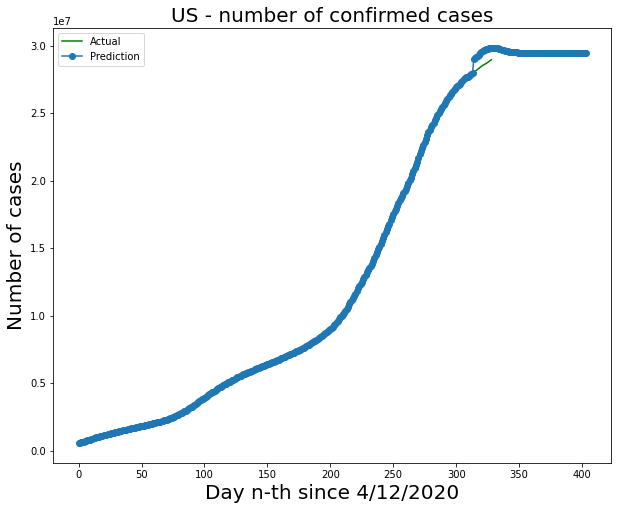

In [270]:
plt.figure(figsize=(10,8))
plt.plot(actual_confirmed_scale,label="Actual",color='g')
plt.plot(predict_confirmed_scale,label="Prediction",marker="o")
plt.xlabel("Day n-th since 4/12/2020", size = 20)
plt.ylabel("Number of cases", size = 20)
plt.title("US - number of confirmed cases", size = '20')
plt.legend()
plt.show()

In [244]:
plt.figure(figsize=(10,8))
plt.plot(features["US confirmed"],label="Actual",color='g')
plt.plot(predict_confirmed_scale[:,2],label="Prediction",marker="o")
plt.xlabel("Day n-th since 1/22/2020", size = 20)
plt.ylabel("Number of cases", size = 20)
plt.title("World - number of confirmed cases", size = '20')
plt.legend()
plt.show()

predict_daily = pd.DataFrame(predict_confirmed_scale[:,2]).diff()
predict_daily.fillna(0)
# print(predict_daily.shape)
# print(data['daily_world_confirmed'].shape)
plt.figure(figsize=(10,8))
plt.plot(data['daily_world_confirmed'],label="Actual",color='g')
plt.plot(predict_daily,label="Prediction",marker="o")
plt.xlabel("Day n-th since 4/12/2020", size = 20)
plt.ylabel("Number of cases", size = 20)
plt.title("World - number of confirmed cases", size = '20')
plt.legend()
plt.show()

KeyError: 'US confirmed'

<Figure size 720x576 with 0 Axes>

In [106]:
for sample in range(11):
#   print('Predict')
  predict = lstm_model_2.predict(generator_val)
  # print(predict[sample])
  print(f'Predict: {scaler_labels.inverse_transform(predict[sample].reshape(1,-1))}',
        f'Actual: {scaler_labels.inverse_transform(generator_val[sample][1].reshape(1,-1))}', sep=' ')
#   print(scaler_labels.inverse_transform(predict[sample].reshape(1,-1)))
#   print("Actual")
#   # print(y_val[sample])
#   print(scaler_labels.inverse_transform(generator_val[sample][1].reshape(1,-1)))

Predict: [[28890188.]] Actual: [[28308933.]]
Predict: [[29058442.]] Actual: [[28386182.]]
Predict: [[29334768.]] Actual: [[28462931.]]
Predict: [[29514644.]] Actual: [[28527162.]]
Predict: [[29658350.]] Actual: [[28578346.]]
Predict: [[29688118.]] Actual: [[28637083.]]
Predict: [[29733078.]] Actual: [[28693847.]]
Predict: [[29784144.]] Actual: [[28760828.]]
Predict: [[29848092.]] Actual: [[28828591.]]
Predict: [[29932462.]] Actual: [[28894756.]]
Predict: [[30021726.]] Actual: [[28952818.]]


In [ ]:
for sample in range(11):
  print('Predict')
  predict = lstm_model.predict(x_val)
  # print(predict[sample])
  print(scaler_labels.inverse_transform(predict[sample].reshape(1,-1)))
  print("Actual")
  # print(y_val[sample])
  print(scaler_labels.inverse_transform(y_val[sample].reshape(1,-1)))

Predict
[[27247728.]]
Actual
[[27392677.]]
Predict
[[27346750.]]
Actual
[[27492121.]]
Predict
[[27428030.]]
Actual
[[27579105.]]
Predict
[[27478352.]]
Actual
[[27644061.]]
Predict
[[27441560.]]
Actual
[[27698038.]]
Predict
[[27516876.]]
Actual
[[27760508.]]
Predict
[[27504632.]]
Actual
[[27830337.]]
Predict
[[27564894.]]
Actual
[[27899603.]]
Predict
[[27624892.]]
Actual
[[28005958.]]
Predict
[[27694928.]]
Actual
[[28077468.]]
Predict
[[27735700.]]
Actual
[[28133963.]]


In [64]:
dataset.shape


(329, 11)

In [65]:
TRAIN_SPLIT

313

In [71]:
predict_confirmed = np.copy(dataset)
future = 1
look_back = 5
for i in range(future):
    sample = predict_confirmed[TRAIN_SPLIT-5+i:TRAIN_SPLIT+i]
    print(sample)
    # Add new demension
    sample = sample.reshape((1,sample.shape[0],sample.shape[1]))
    predict = lstm_model.predict(sample)
    print(predict)

[[0.99065456 0.98410336 0.97872785 1.         0.9909682  0.98437718
  1.         0.         0.88754414 0.91221155 0.82618361]
 [0.99262855 0.98608329 0.9854279  0.99807825 0.99301825 0.98817421
  1.         0.         0.92674875 0.94504543 0.88123305]
 [0.99491313 0.98972728 0.98927152 0.99900251 0.99516157 0.99116753
  1.         0.         0.944563   0.95927828 0.90800099]
 [0.99746684 0.99478733 0.9939793  0.99969251 0.99753969 0.99576903
  1.         0.         0.96899766 0.97721746 0.94854428]
 [1.         1.         1.         0.9992433  1.         1.
  1.         0.         1.         1.         1.        ]]
[[0.99877894]]


In [75]:
predict_confirmed[TRAIN_SPLIT+i+1]

array([1.00551131, 1.00935271, 1.00841876, 1.0042098 , 1.00696041,
       1.0081402 , 1.        , 0.        , 1.05883341, 1.03932333,
       1.10717697])

In [83]:
predict_confirmed[TRAIN_SPLIT+i+1,7]

0.0

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 5  ## number of steps
n_features = 1 ## number of features you want to predict (for univariate time series n_features=1)
generator = TimeseriesGenerator(dataset,dataset[:, 0],length = n_input,batch_size=1)
len(generator)

311

In [ ]:
def create_timeseries(dataset, target):
    from keras.preprocessing.sequence import TimeseriesGenerator
    n_input = 5 
    n_features = 11
    generator = TimeseriesGenerator(dataset,target,length = n_input,batch_size=1)
    return generator


In [ ]:
dataset[:TRAIN_SPLIT,]

array([[0.00000000e+00, 0.00000000e+00, 8.01887678e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.61623960e-04, 2.42582909e-03, 7.52154712e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.79269751e-03, 9.88417966e-03, 1.17643079e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.90222207e-01, 9.83475876e-01, 9.83055281e-01, ...,
        9.01781404e-01, 9.22456455e-01, 8.32740184e-01],
       [9.94915662e-01, 9.91890542e-01, 9.94785194e-01, ...,
        9.43164249e-01, 9.55655397e-01, 9.02212529e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [ ]:
generator_train = create_timeseries(dataset[:TRAIN_SPLIT, 1:],dataset[:TRAIN_SPLIT,0])
generator_val = create_timeseries(dataset[TRAIN_SPLIT:, 1:],dataset[TRAIN_SPLIT:,0].reshape(-1,1))

In [ ]:
x,y = generator_train[10]
x,y

(array([[[0.05597041, 0.00416804, 0.0176167 , 0.01022252, 0.00553507,
          0.01123822, 0.59178587, 0.        , 0.        , 0.        ],
         [0.06348754, 0.00455819, 0.0193469 , 0.01144041, 0.00616588,
          0.01249809, 0.61385464, 0.        , 0.        , 0.        ],
         [0.06807243, 0.00503376, 0.02165498, 0.01276302, 0.00722138,
          0.01432017, 0.62674262, 0.        , 0.        , 0.        ],
         [0.07217576, 0.00554968, 0.02374987, 0.01398455, 0.00811807,
          0.01590895, 0.62807141, 0.        , 0.        , 0.        ],
         [0.07485706, 0.0056033 , 0.0255397 , 0.01511124, 0.00900333,
          0.01757699, 0.63549539, 0.        , 0.        , 0.        ]]]),
 array([0.01650092]))

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stop = EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)

# model.fit(generator_train,validation_data=generator_test,epochs=100,callbacks=[early_stop],steps_per_epoch=10)

In [ ]:
x,y = generator_test[1]
x,y

(array([[[1.00736867, 1.00876283, 1.00998555, 1.00822027, 1.00615388,
          1.00843095, 1.        , 0.        , 1.0865735 , 1.06906167,
          1.14438007],
         [1.01079259, 1.01236201, 1.01736944, 1.00548852, 1.0094507 ,
          1.01424044, 1.        , 0.        , 1.10677365, 1.08648481,
          1.18314489],
         [1.01441694, 1.01924386, 1.02378896, 1.00681082, 1.01249143,
          1.01846368, 1.        , 0.        , 1.14683158, 1.11677049,
          1.2587817 ],
         [1.01802598, 1.02668864, 1.03400374, 1.0051681 , 1.01569743,
          1.0191504 , 1.        , 0.        , 1.18833733, 1.14786306,
          1.34526149],
         [1.02203985, 1.0338124 , 1.04065303, 1.00693976, 1.01927283,
          1.02528408, 1.        , 0.        , 1.24008921, 1.18458556,
          1.45311632]]]),
 array([[1.02582697]]))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation
model = Sequential()
model.add(LSTM(150,activation="relu",input_shape=(n_input,n_features)))
#model.add(Dropout(0.2))
model.add(Dense(75, activation='relu'))
model.add(Dense(units=1))
#model.add(Activation('softmax'))
#model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_9 (Dense)              (None, 75)                11325     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 76        
Total params: 102,601
Trainable params: 102,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
validation_set = np.append(scaled_train[310],scaler_labels)
validation_set=validation_set.reshape(6,1)
validation_set

In [ ]:
# Time series data

# We need a function to convert the data to time series data

def create_data(dataset, target, start_index, end_index, history_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset)

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    data.append(dataset[indices])
    labels.append(target[i])


  return np.array(data), np.array(labels)

In [ ]:
#We use history from past 5 days to predict the next day

past_history = 5

x_train, y_train = create_data(dataset, dataset[:, 0], 0,
                              TRAIN_SPLIT, past_history)
x_val, y_val = create_data(dataset, dataset[:, 0],
                            TRAIN_SPLIT, None, past_history)

print(y_train.shape)
print(x_train.shape)
print(y_val.shape)
print(x_val.shape)

(295,)
(295, 5, 11)
(11,)
(11, 5, 11)


In [ ]:
x_train[0]


array([[0.00000000e+00, 0.00000000e+00, 8.01887678e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.36406713e-04, 3.20281733e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.61623960e-04, 2.42582909e-03, 7.52154712e-04, 2.39754258e-04,
        9.30813091e-04, 5.79002886e-04, 0.00000000e+00, 3.51395816e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.79269751e-03, 9.88417966e-03, 1.17643079e-03, 1.15848095e-02,
        2.81909232e-03, 1.04178515e-03, 3.50610999e-03, 3.78925239e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.09248634e-03, 1.43650681e-02, 1.37174090e-03, 5.07195873e-03,
        2.69957624e-03, 1.61809354e-03, 3.27798401e-03, 4.20873124e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.28501525e-03, 2.46991452e-02, 1.73948217e-03, 6.88850629e-03,
        3.76369492e-03, 2.09905639e-03, 4.30770560e-03, 4.54874056e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+

In [ ]:
y_train[0]

0.005505497023571393

In [ ]:
lstm_model = tf.keras.models.Sequential()
lstm_model.add(tf.keras.layers.LSTM(50, input_shape=x_train.shape[-2:],activation='relu'))
lstm_model.add(tf.keras.layers.Dense(units=1))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
lstm_model.compile(optimizer='adam', loss='mae')


In [ ]:
history = lstm_model.fit(
    generator_train,
    epochs=100,
    batch_size=16,
    validation_data=generator_val,
    verbose=1,
    shuffle=False
)

Epoch 1/100
295/295 [==============================] - 2s 4ms/step - loss: 0.0045 - val_loss: 0.0376
Epoch 2/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0043 - val_loss: 0.0537
Epoch 3/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0042 - val_loss: 0.0286
Epoch 4/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0054 - val_loss: 0.0892
Epoch 5/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0051 - val_loss: 0.0734
Epoch 6/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0068 - val_loss: 0.0246
Epoch 7/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0041 - val_loss: 0.0227
Epoch 8/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0042 - val_loss: 0.0582
Epoch 9/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0112 - val_loss: 0.0870
Epoch 10/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0045 - val_lo

In [ ]:
history = lstm_model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(x_val,y_val),
    verbose=1,
    shuffle=False
)

Epoch 1/100
19/19 [==============================] - 1s 18ms/step - loss: 0.0823 - val_loss: 0.1280
Epoch 2/100
19/19 [==============================] - 0s 6ms/step - loss: 0.1203 - val_loss: 0.2797
Epoch 3/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0746 - val_loss: 0.1694
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0367 - val_loss: 0.0285
Epoch 5/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0239 - val_loss: 0.0099
Epoch 6/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0131 - val_loss: 0.0219
Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0182 - val_loss: 0.0034
Epoch 8/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0815 - val_loss: 0.0122
Epoch 9/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0361 - val_loss: 0.2462
Epoch 10/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0151 - val_loss: 0.0242
Epoch 11

19/19 [==============================] - 0s 4ms/step - loss: 0.0275 - val_loss: 0.1793
Epoch 84/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0083 - val_loss: 0.0293
Epoch 85/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0077 - val_loss: 0.0681
Epoch 86/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0084 - val_loss: 0.0617
Epoch 87/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0284 - val_loss: 0.1288
Epoch 88/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0129 - val_loss: 0.0708
Epoch 89/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0284 - val_loss: 0.0167
Epoch 90/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0190 - val_loss: 0.1212
Epoch 91/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0135 - val_loss: 0.0757
Epoch 92/100
19/19 [==============================] - 0s 5ms/step - loss: 0.0282 - val_loss: 0.1795
Epoch 93/100


In [ ]:
y_pred = lstm_model.predict(x_val)
print(y_pred)
print(y_val)

[[1.0061473 ]
 [1.0051036 ]
 [1.0030892 ]
 [1.000191  ]
 [1.0010319 ]
 [0.99703   ]
 [0.9961145 ]
 [0.9944383 ]
 [0.9918914 ]
 [0.9901309 ]
 [0.98645854]]
[1.02203985 1.02582697 1.02913957 1.03161329 1.03366889 1.03604793
 1.03870722 1.04134508 1.04539539 1.0481187  1.05027019]


In [ ]:
x_train[1]

array([[1.61623960e-04, 2.42582909e-03, 7.52154712e-04, 2.39754258e-04,
        9.30813091e-04, 5.79002886e-04, 0.00000000e+00, 3.51395816e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.79269751e-03, 9.88417966e-03, 1.17643079e-03, 1.15848095e-02,
        2.81909232e-03, 1.04178515e-03, 3.50610999e-03, 3.78925239e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.09248634e-03, 1.43650681e-02, 1.37174090e-03, 5.07195873e-03,
        2.69957624e-03, 1.61809354e-03, 3.27798401e-03, 4.20873124e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.28501525e-03, 2.46991452e-02, 1.73948217e-03, 6.88850629e-03,
        3.76369492e-03, 2.09905639e-03, 4.30770560e-03, 4.54874056e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.50549702e-03, 3.34619724e-02, 1.98081514e-03, 8.78551284e-03,
        4.95763476e-03, 2.64369668e-03, 5.22031358e-03, 4.92901924e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+

In [ ]:
generator_train[0].

(array([[[0.00000000e+00, 8.01887678e-04, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 4.36406713e-04, 3.20281733e-01, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00],
         [2.42582909e-03, 7.52154712e-04, 2.39754258e-04, 9.30813091e-04,
          5.79002886e-04, 0.00000000e+00, 3.51395816e-01, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00],
         [9.88417966e-03, 1.17643079e-03, 1.15848095e-02, 2.81909232e-03,
          1.04178515e-03, 3.50610999e-03, 3.78925239e-01, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00],
         [1.43650681e-02, 1.37174090e-03, 5.07195873e-03, 2.69957624e-03,
          1.61809354e-03, 3.27798401e-03, 4.20873124e-01, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00],
         [2.46991452e-02, 1.73948217e-03, 6.88850629e-03, 3.76369492e-03,
          2.09905639e-03, 4.30770560e-03, 4.54874056e-01, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00]]]),
 array([0.0055055]))

In [ ]:
# Deep Learning Libraries
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D,AveragePooling2D
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import applications
from tensorflow.keras.regularizers import l2
tf.random.set_seed(42)

lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, input_shape=(1,10),activation='relu'),
    tf.keras.layers.Dense(1)
])
# reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
lstm_model.compile(optimizer='adam', loss='mae')

In [ ]:
history = lstm_model.fit(generator_train, batch_size =8,epochs = 100, validation_data=generator_val, verbose=2)

Epoch 1/100
295/295 - 2s - loss: 0.0430 - val_loss: 0.1099
Epoch 2/100
295/295 - 1s - loss: 0.0146 - val_loss: 0.0250
Epoch 3/100
295/295 - 1s - loss: 0.0136 - val_loss: 0.1549
Epoch 4/100
295/295 - 1s - loss: 0.0121 - val_loss: 0.0491
Epoch 5/100
295/295 - 1s - loss: 0.0092 - val_loss: 0.0549
Epoch 6/100
295/295 - 1s - loss: 0.0092 - val_loss: 0.0122
Epoch 7/100
295/295 - 1s - loss: 0.0086 - val_loss: 0.1609
Epoch 8/100
295/295 - 1s - loss: 0.0087 - val_loss: 0.0326
Epoch 9/100
295/295 - 1s - loss: 0.0097 - val_loss: 0.0223
Epoch 10/100
295/295 - 1s - loss: 0.0082 - val_loss: 0.0434
Epoch 11/100
295/295 - 1s - loss: 0.0083 - val_loss: 0.0262
Epoch 12/100
295/295 - 1s - loss: 0.0073 - val_loss: 0.0849
Epoch 13/100
295/295 - 1s - loss: 0.0085 - val_loss: 0.0154
Epoch 14/100
295/295 - 1s - loss: 0.0091 - val_loss: 0.0541
Epoch 15/100
295/295 - 1s - loss: 0.0087 - val_loss: 0.0374
Epoch 16/100
295/295 - 1s - loss: 0.0100 - val_loss: 0.0617
Epoch 17/100
295/295 - 1s - loss: 0.0075 - val_lo

Epoch 1/100


ValueError: in user code:

    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:271 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer sequential_19: expected shape=(None, None, 10), found shape=(None, 5, 11)


In [ ]:
for sample in range(14):
  print('Predict')
  predict = lstm_model.predict(x_val)
  # print(predict[sample])
  print(scaler_labels.inverse_transform(predict[sample].reshape(1,-1)))
  print("Actual")
  # print(y_val[sample])
  print(scaler_labels.inverse_transform(y_val[sample].reshape(1,-1)))

Predict


ValueError: in user code:

    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/dmitrynortsev/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:271 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer sequential_19: expected shape=(None, None, 10), found shape=(None, 5, 11)


In [ ]:
dataset.shape
past_history

5

In [ ]:
predict_confirmed = np.copy(dataset)
sample = predict_confirmed[TRAIN_SPLIT-past_history+i:TRAIN_SPLIT+i]
sample

array([[1.03161329, 1.0477027 , 1.05400099, 1.0128067 , 1.02765771,
        1.03820625, 1.        , 0.        , 1.35469042, 1.26581983,
        1.69257368],
       [1.03366889, 1.04985949, 1.06121633, 1.01086034, 1.02978366,
        1.04221091, 1.        , 0.        , 1.41452982, 1.31138138,
        1.80535157],
       [1.03604793, 1.05370284, 1.06535557, 1.01179644, 1.03200633,
        1.04536791, 1.        , 0.        , 1.44172035, 1.33113143,
        1.86019011],
       [1.03870722, 1.05908352, 1.07042541, 1.01249528, 1.0344725 ,
        1.05022104, 1.        , 0.        , 1.47901584, 1.35602452,
        1.94324976],
       [1.04134508, 1.06431273, 1.07690916, 1.01204032, 1.0370239 ,
        1.05468337, 1.        , 0.        , 1.52633583, 1.38763846,
        2.04866529]])

In [ ]:
sample.reshape((1,sample.shape[0],sample.shape[1]))

array([[[1.03161329, 1.0477027 , 1.05400099, 1.0128067 , 1.02765771,
         1.03820625, 1.        , 0.        , 1.35469042, 1.26581983,
         1.69257368],
        [1.03366889, 1.04985949, 1.06121633, 1.01086034, 1.02978366,
         1.04221091, 1.        , 0.        , 1.41452982, 1.31138138,
         1.80535157],
        [1.03604793, 1.05370284, 1.06535557, 1.01179644, 1.03200633,
         1.04536791, 1.        , 0.        , 1.44172035, 1.33113143,
         1.86019011],
        [1.03870722, 1.05908352, 1.07042541, 1.01249528, 1.0344725 ,
         1.05022104, 1.        , 0.        , 1.47901584, 1.35602452,
         1.94324976],
        [1.04134508, 1.06431273, 1.07690916, 1.01204032, 1.0370239 ,
         1.05468337, 1.        , 0.        , 1.52633583, 1.38763846,
         2.04866529]]])

In [ ]:
predict_confirmed = np.copy(dataset)
future = 14
for i in range(future):
#     print(TRAIN_SPLIT+i+1)
    sample = predict_confirmed[TRAIN_SPLIT-past_history+i:TRAIN_SPLIT+i]
    # print(sample.shape)
    sample = sample.reshape((1,sample.shape[0],sample.shape[1]))
    predict = lstm_model.predict(sample)
#     print("Predict: ", predict)
#     print("Actual: ", dataset[TRAIN_SPLIT+i+1,2])
    try:
        predict_confirmed[TRAIN_SPLIT+i+1,2] = predict
    except:
        print()

In [ ]:
x_val.shape[0]

(11, 5, 11)

In [ ]:
predict_confirmed = np.copy(dataset)
future = 14
for i in range(x_val.shape[0]):
#     print(TRAIN_SPLIT+i+1)
    sample = predict_confirmed[TRAIN_SPLIT-past_history+i:TRAIN_SPLIT+i]
    # print(sample.shape)
    sample = sample.reshape((1,sample.shape[0],sample.shape[1]))
    predict = lstm_model.predict(sample)
#     print("Predict: ", predict)
#     print("Actual: ", dataset[TRAIN_SPLIT+i+1,2])
    try:
        predict_confirmed[TRAIN_SPLIT+i+1,2] = predict
    except:
        print()

In [ ]:
# column_indices = {name: i for i, name in enumerate(df_bydate.columns)}

# df_bydate['date'] = df_bydate['date'].astype(str)
# n = len(df)
train_df = df_bydate[0:int(n*0.90)]
val_df = df_bydate[int(n*0.90):int(n*0.95)]
test_df = df_bydate[int(n*0.95):]

In [ ]:
train_df

Confirmed  Deaths     Recovered      Active    FIPS  Incident_Rate  \
0       555461   22365  1.630247e+05    533142.0  1813.0     132.096557   
1       559705   23438  1.624617e+05    536688.0  1810.0     139.013118   
2       628793   26737  1.672647e+05    704483.0  1834.0     153.044290   
3       636665   28719  1.694757e+05    608157.0  1822.0     152.156206   
4       667979   33290  1.736387e+05    635024.0  1822.0     160.063317   
..         ...     ...           ...         ...     ...            ...   
279   23785527  402933  9.763007e+06  13999628.0  1822.0    6819.348595   
280   23962636  404724  9.805164e+06  14133640.0  1822.0    6862.697631   
281   24105721  406148  9.884103e+06  14195297.0  1822.0    6896.913416   
282   24281379  408849  1.001120e+07  14257888.0  1822.0    6939.320187   
283   24463893  413185  1.013146e+07  14318578.0  1822.0    6986.962072   

              UID  Testing_Rate  People_Tested  Mortality_Rate  \
0    7.650007e+07    939.956205      2805892.0        3.233762   
1    7.636371e+07    994.309773      2738799.0        3.335102   
2    7.663165e+07   1037.753196      3277827.0        3.424767   
3    7.650007e+07   1091.853820      3242755.0        3.561394   
4    7.650007e+07   1137.003935      3401064.0        3.672137   
..            ...           ...            ...             ...   
279  7.650007e+07  84047.685931    156478414.0        2.190583   
280  7.650007e+07  84472.174254    156478414.0        2.190583   
281  7.650007e+07  85060.976176    156478414.0        2.190583   
282  7.650007e+07  85613.664609    156478414.0        2.190583   
283  7.650007e+07  86107.125309    156478414.0        2.190583   

     total_vaccinations  people_vaccinated  people_fully_vaccinated  
0                   0.0                0.0                      0.0  
1                   0.0                0.0                      0.0  
2                   0.0                0.0                      0.0  
3                   0.0                0.0                      0.0  
4                   0.0                0.0                      0.0  
..                  ...                ...                      ...  
279          12279180.0         10595866.0                1610524.0  
280          12279180.0         10595866.0                1610524.0  
281          15707588.0         13595803.0                2023124.0  
282          16525281.0         14270441.0                2161419.0  
283          17546374.0         15053257.0                2394961.0  

[284 rows x 13 columns]

In [ ]:
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [ ]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

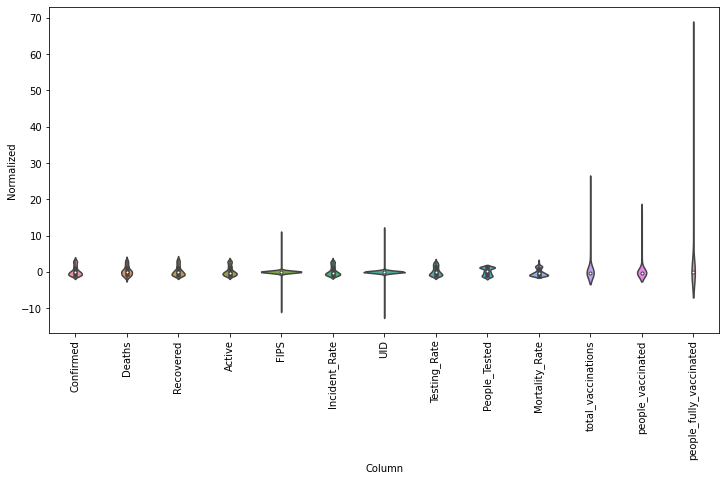

In [ ]:
import seaborn as sns
df_std = (df_bydate - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
df_std.dtypes
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df_bydate.keys(), rotation=90)


In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['Confirmed'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['Confirmed']

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing


In [ ]:
test_df.dtypes

date                        object
Confirmed                    int64
Deaths                       int64
Recovered                  float64
Active                     float64
FIPS                       float64
Incident_Rate              float64
UID                        float64
Testing_Rate               float64
People_Tested              float64
Mortality_Rate             float64
vaccine                     object
total_vaccinations         float64
people_vaccinated          float64
people_fully_vaccinated    float64
dtype: object

In [ ]:

df_bydate.values

array([['2020-04-12', 555461, 22365, ..., 0.0, 0.0, 0.0],
       ['2020-04-13', 559705, 23438, ..., 0.0, 0.0, 0.0],
       ['2020-04-14', 628793, 26737, ..., 0.0, 0.0, 0.0],
       ...,
       ['2021-02-20', 28005958, 495824, ..., 61289500.0, 42809595.0,
        17895667.0],
       ['2021-02-21', 28077468, 497645, ..., 63090634.0, 43628092.0,
        18865319.0],
       ['2021-02-22', 28133963, 498894, ..., 63090634.0, 43628092.0,
        18865319.0]], dtype=object)

In [ ]:
import tensorflow as tf
import tensorflow_transform as tft

import tensorflow_transform.beam as tft_beam
from tensorflow_transform.tf_metadata import dataset_metadata
from tensorflow_transform.tf_metadata import dataset_schema

In [ ]:
raw_data_metadata = dataset_metadata.DatasetMetadata(
    dataset_schema.from_feature_spec({
        'y': tf.io.FixedLenFeature([], tf.float32),
        'x': tf.io.FixedLenFeature([], tf.float32),
        's': tf.io.FixedLenFeature([], tf.string),
    }))

In [ ]:
train_df

date  Confirmed  Deaths     Recovered      Active    FIPS  \
0   2020-04-12     555461   22365  1.630247e+05    533142.0  1813.0   
1   2020-04-13     559705   23438  1.624617e+05    536688.0  1810.0   
2   2020-04-14     628793   26737  1.672647e+05    704483.0  1834.0   
3   2020-04-15     636665   28719  1.694757e+05    608157.0  1822.0   
4   2020-04-16     667979   33290  1.736387e+05    635024.0  1822.0   
..         ...        ...     ...           ...         ...     ...   
263 2021-01-01   20061751  352726  8.317452e+06  11702888.0  1822.0   
264 2021-01-02   20215145  354851  8.347891e+06  11435565.0  1822.0   
265 2021-01-03   20514931  357330  8.491745e+06  11983884.0  1822.0   
266 2021-01-04   20723005  358747  8.535410e+06  12149304.0  1822.0   
267 2021-01-05   20906411  360868  8.699497e+06  12163791.0  1822.0   

     Incident_Rate           UID  Testing_Rate  People_Tested  Mortality_Rate  \
0       132.096557  7.650007e+07    939.956205      2805892.0        3.233762   
1       139.013118  7.636371e+07    994.309773      2738799.0        3.335102   
2       153.044290  7.663165e+07   1037.753196      3277827.0        3.424767   
3       152.156206  7.650007e+07   1091.853820      3242755.0        3.561394   
4       160.063317  7.650007e+07   1137.003935      3401064.0        3.672137   
..             ...           ...           ...            ...             ...   
263    5892.683739  7.650007e+07  76111.280612    156478414.0        2.190583   
264    5929.684843  7.650007e+07  76378.852120    156478414.0        2.190583   
265    5998.559423  7.650007e+07  76901.664753    156478414.0        2.190583   
266    6050.370293  7.650007e+07  77223.932342    156478414.0        2.190583   
267    6102.050787  7.650007e+07  77723.442920    156478414.0        2.190583   

                      vaccine  total_vaccinations  people_vaccinated  \
0                           0                 0.0                0.0   
1                           0                 0.0                0.0   
2                           0                 0.0                0.0   
3                           0                 0.0                0.0   
4                           0                 0.0                0.0   
..                        ...                 ...                ...   
263  Moderna, Pfizer/BioNTech           2794588.0          2794588.0   
264  Moderna, Pfizer/BioNTech           4225756.0          4225756.0   
265  Moderna, Pfizer/BioNTech           4225756.0          4225756.0   
266  Moderna, Pfizer/BioNTech           4563260.0          4563260.0   
267  Moderna, Pfizer/BioNTech           4836469.0          4836469.0   

     people_fully_vaccinated  
0                        0.0  
1                        0.0  
2                        0.0  
3                        0.0  
4                        0.0  
..                       ...  
263                      0.0  
264                      0.0  
265                      0.0  
266                      0.0  
267                      0.0  

[268 rows x 15 columns]

In [ ]:
train_df['date'] = train_df['date'].astype(str)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[268 rows x 0 columns]

In [ ]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, target, batch_size=32):
  dataframe = dataframe.copy()
  if dataframe['date'].dtype == 'object':
    # Convert datatime to string
      dataframe['date'] = dataframe['date'].astype(str)
  labels = dataframe.pop(target)
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

batch_size = 5
train_ds = df_to_dataset(train_df, 'Confirmed', batch_size=batch_size)
train_ds

<PrefetchDataset shapes: ({date: (None,), Deaths: (None,), Recovered: (None,), Active: (None,), FIPS: (None,), Incident_Rate: (None,), UID: (None,), Testing_Rate: (None,), People_Tested: (None,), Mortality_Rate: (None,), vaccine: (None,), total_vaccinations: (None,), people_vaccinated: (None,), people_fully_vaccinated: (None,)}, (None,)), types: ({date: tf.string, Deaths: tf.int64, Recovered: tf.float64, Active: tf.float64, FIPS: tf.float64, Incident_Rate: tf.float64, UID: tf.float64, Testing_Rate: tf.float64, People_Tested: tf.float64, Mortality_Rate: tf.float64, vaccine: tf.string, total_vaccinations: tf.float64, people_vaccinated: tf.float64, people_fully_vaccinated: tf.float64}, tf.int64)>

In [ ]:
[(train_features, label_batch)] = train_ds.take(1)
print('Every feature:', list(train_features.keys()))
print('A batch of mortality rate:', train_features['vaccine'])
print('A batch of targets:', label_batch )

Every feature: ['date', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate', 'UID', 'Testing_Rate', 'People_Tested', 'Mortality_Rate', 'vaccine', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']
A batch of mortality rate: tf.Tensor(b'0', shape=(), dtype=string)
A batch of targets: tf.Tensor(555461, shape=(), dtype=int64)


In [ ]:
batch_size = 256
train_ds = df_to_dataset(train_df, 'Confirmed', batch_size=batch_size)
val_ds = df_to_dataset(val_df, 'Confirmed', batch_size=batch_size)
test_ds = df_to_dataset(test_df, 'Confirmed', batch_size=batch_size)

KeyError: 'date'

In [ ]:
train_ds

<PrefetchDataset shapes: ({date: (None,), Deaths: (None,), Recovered: (None,), Active: (None,), FIPS: (None,), Incident_Rate: (None,), UID: (None,), Testing_Rate: (None,), People_Tested: (None,), Mortality_Rate: (None,), vaccine: (None,), total_vaccinations: (None,), people_vaccinated: (None,), people_fully_vaccinated: (None,)}, (None,)), types: ({date: tf.string, Deaths: tf.int64, Recovered: tf.float64, Active: tf.float64, FIPS: tf.float64, Incident_Rate: tf.float64, UID: tf.float64, Testing_Rate: tf.float64, People_Tested: tf.float64, Mortality_Rate: tf.float64, vaccine: tf.string, total_vaccinations: tf.float64, people_vaccinated: tf.float64, people_fully_vaccinated: tf.float64}, tf.int64)>

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

def get_normalization_layer(name, dataset):
  # Create a Normalization layer for our feature.
  normalizer = preprocessing.Normalization()

  # Prepare a Dataset that only yields our feature.
  feature_ds = dataset.map(lambda x, y: x[name])
    
  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)

  return normalizer

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

all_inputs = []
encoded_features = []

# Numeric features.
for header in ['Recovered']:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

In [ ]:
encoded_features[0]

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'normalization_4')>

In [ ]:
import tensorflow_transform as tft

tft.scale_to_0_1(train_ds['Recovered'])


TypeError: 'PrefetchDataset' object is not subscriptable

In [ ]:
train_df

date  Confirmed  Deaths     Recovered      Active    FIPS  \
0    2020-04-12     555461   22365  1.630247e+05    533142.0  1813.0   
1    2020-04-13     559705   23438  1.624617e+05    536688.0  1810.0   
2    2020-04-14     628793   26737  1.672647e+05    704483.0  1834.0   
3    2020-04-15     636665   28719  1.694757e+05    608157.0  1822.0   
4    2020-04-16     667979   33290  1.736387e+05    635024.0  1822.0   
..          ...        ...     ...           ...         ...     ...   
263  2021-01-01   20061751  352726  8.317452e+06  11702888.0  1822.0   
264  2021-01-02   20215145  354851  8.347891e+06  11435565.0  1822.0   
265  2021-01-03   20514931  357330  8.491745e+06  11983884.0  1822.0   
266  2021-01-04   20723005  358747  8.535410e+06  12149304.0  1822.0   
267  2021-01-05   20906411  360868  8.699497e+06  12163791.0  1822.0   

     Incident_Rate           UID  Testing_Rate  People_Tested  Mortality_Rate  \
0       132.096557  7.650007e+07    939.956205      2805892.0        3.233762   
1       139.013118  7.636371e+07    994.309773      2738799.0        3.335102   
2       153.044290  7.663165e+07   1037.753196      3277827.0        3.424767   
3       152.156206  7.650007e+07   1091.853820      3242755.0        3.561394   
4       160.063317  7.650007e+07   1137.003935      3401064.0        3.672137   
..             ...           ...           ...            ...             ...   
263    5892.683739  7.650007e+07  76111.280612    156478414.0        2.190583   
264    5929.684843  7.650007e+07  76378.852120    156478414.0        2.190583   
265    5998.559423  7.650007e+07  76901.664753    156478414.0        2.190583   
266    6050.370293  7.650007e+07  77223.932342    156478414.0        2.190583   
267    6102.050787  7.650007e+07  77723.442920    156478414.0        2.190583   

                      vaccine  total_vaccinations  people_vaccinated  \
0                           0                 0.0                0.0   
1                           0                 0.0                0.0   
2                           0                 0.0                0.0   
3                           0                 0.0                0.0   
4                           0                 0.0                0.0   
..                        ...                 ...                ...   
263  Moderna, Pfizer/BioNTech           2794588.0          2794588.0   
264  Moderna, Pfizer/BioNTech           4225756.0          4225756.0   
265  Moderna, Pfizer/BioNTech           4225756.0          4225756.0   
266  Moderna, Pfizer/BioNTech           4563260.0          4563260.0   
267  Moderna, Pfizer/BioNTech           4836469.0          4836469.0   

     people_fully_vaccinated  
0                        0.0  
1                        0.0  
2                        0.0  
3                        0.0  
4                        0.0  
..                       ...  
263                      0.0  
264                      0.0  
265                      0.0  
266                      0.0  
267                      0.0  

[268 rows x 15 columns]

In [ ]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [ ]:
df_std = (df_bydate - train_mean) / train_std
train_df
df_std = df_std.melt(var_name='Column', value_name='Normalized')
df_std
# plt.figure(figsize=(12, 6))
# ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
# _ = ax.set_xticklabels(df_bydate.keys(), rotation=90)

Column  Normalized
0                   Confirmed   -1.116320
1                   Confirmed   -1.115652
2                   Confirmed   -1.104778
3                   Confirmed   -1.103539
4                   Confirmed   -1.098610
...                       ...         ...
4103  people_fully_vaccinated   53.206423
4104  people_fully_vaccinated   56.101774
4105  people_fully_vaccinated   58.930381
4106  people_fully_vaccinated   62.132493
4107  people_fully_vaccinated   62.132493

[4108 rows x 2 columns]